# Modelo Preditivo: Análise de Receita para Gazeta

## Introdução
Este notebook tem como objetivo analisar os dados contábeis fornecidos pela Gazeta para desenvolver um modelo preditivo que estime receitas futuras. A análise segue um fluxo estruturado, começando pela preparação dos dados e culminando na construção de um modelo.

Os principais passos incluem:

- **Limpeza das Tabelas:** Removemos valores ausentes, outliers e realizamos a padronização dos dados para garantir a qualidade e a consistência da análise.

- **Categorização dos Dados:** Os dados foram organizados em categorias significativas para facilitar a análise e a interpretação dos resultados.

- **Criação de Gráficos:** Utilizamos visualizações para explorar padrões e tendências nos dados, ajudando a direcionar o processo de modelagem.

Essas etapas asseguram a confiabilidade do modelo preditivo. Seguindo este notebook, você será capaz de reproduzir a análise e compreender cada fase do processo.

## Instruções de Uso


Para garantir que os códigos deste notebook funcionem corretamente, é necessário que as tabelas de dados estejam instaladas e organizadas na estrutura de pastas apropriada. As etapas a seguir direcionam o processo de download, organização e verificação das tabelas necessárias.


1. Acesse o Google Drive:


2. Use o link fornecido para acessar a pasta no Google Drive que contém as tabelas.
Baixe as Tabelas:


3. Faça o download dos arquivos .xlsx para o seu computador.


4. No diretório onde este notebook está salvo, adicione as tabelas na pasta chamada data.


5. Certifique-se de que a estrutura de pastas esteja organizada da seguinte forma:


        /notebook
            |-- notebook.ipynb
                |-- /data
                    |-- tabela_agosto_final.xlxs
                    |-- tabela_agosto.xlxs
                    |-- tabela_audiencia
                    |-- tabela_data_sarimax.xlxs
                    |-- tabela_limpa.xlxs 
                    |-- tabela_meta.xlxs
                    |-- tabela-rec_xlxs

Seguindo esses passos, pode-se garantir que todas as tabelas necessárias estejam corretamente configuradas, permitindo que o notebook seja executado sem problemas. A partir disso, esse estará pronto para exploração dos dados e avanço nas análises.


### Instalação de bibliotecas
Para realizar a clusterização dos dados, é necessário instalar algumas bibliotecas que serão importantes no processo. Dentre os algoritmos disponíveis, instalamos o KMeans, pois será o algoritmo utilizado para realizar a clusterização. O KMeans é amplamente utilizado por sua eficiência em agrupar dados com características semelhantes, e sua implementação na scikit-learn permite fácil integração com o restante das bibliotecas. Aqui estão as importações necessárias:

In [24]:
# Instalação das bibliotecas necessárias
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install xgboost
! pip install statsmodels
! pip install tensorflow
! pip install keras
! pip install shap
! pip install ipywidgets


In [25]:
# Importando bibliotecas para manipulação de dados
import pandas as pd  # Manipulação de dataframes
import numpy as np  # Operações matemáticas e matrizes

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt  
import seaborn as sns  

# Importando bibliotecas de avaliação de modelos e preprocessamento
from sklearn.preprocessing import StandardScaler  # Normalização e padronização de dados
from sklearn.metrics import r2_score  # Métrica R² para avaliação de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Métricas MSE e MAE para avaliação de modelos
from sklearn.model_selection import train_test_split  # Divisão de dados em treino e teste
from sklearn.model_selection import learning_curve  # Curva de aprendizado
from sklearn.model_selection import GridSearchCV  # Busca em grade para otimização de hiperparâmetros
from itertools import product

# Importando os modelos de machine learning
from sklearn.cluster import KMeans  # Algoritmo de clustering K-means
from sklearn.neighbors import KNeighborsRegressor  # Algoritmo de regressão K-vizinhos mais próximos
from sklearn.tree import DecisionTreeRegressor  # Regressor baseado em árvore de decisão
from sklearn.ensemble import RandomForestRegressor  # Regressor de Florestas Aleatórias (Random Forest)
from sklearn.ensemble import VotingRegressor, StackingRegressor  # Regressão por votação e stacking (ensemble)
import xgboost as xgb  # Biblioteca XGBoost 
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Modelo SARIMAX para séries temporais
from tensorflow.keras.models import Sequential  # Modelo sequencial
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Camadas do Keras
from tensorflow.keras import regularizers  # Regularizadores para evitar overfitting

# Importando bibliotecas auxiliares
import shap  # Visualização e explicação de modelos de machine learning
from itertools import product  # Função product para criar combinações de parâmetros

# Bibliotecas para Manipulação e Acesso dos Dados
import pandas as pd
import numpy as np

# Bibliotecas para Métricas
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Biblioteca para o Modelo
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Bibliotecas para Visualização e Interface
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import widgets, interactive

# Configuração de avisos
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Carrega os dados de um arquivo Excel (.xlsx) para um DataFrame do pandas
df = pd.read_excel('.xlsx')

# Exibe as primeiras 5 linhas do DataFrame para ter uma visão geral dos dados
print(df.head())

### Limpeza dos dados

A limpeza de dados é uma etapa importante em qualquer análise. Desse modo, garantir que os dados sejam precisos e consistentes é fundamental para evitar erros e obter bons resultados. Dados desorganizados, como duplicatas ou valores ausentes, podem levar a conclusões equivocadas e decisões ruins. Além disso, a qualidade dos dados afeta diretamente o desempenho dos modelos analíticos. Por isso, fizemos a seguinte limpeza:

In [ ]:
# Converte as colunas numéricas que têm vírgulas para o formato correto
df['Taxa_Ac._TRI_%_PIB'] = df['Taxa_Ac._TRI_%_PIB'].str.replace(',', '.').astype(float)

# Trata valores ausentes
df['Vl_Liquido_Final'] = df['Vl_Liquido_Final'].fillna(df['Vl_Liquido_Final'].mean())
df['IPCA_ES'] = df['IPCA_ES'].fillna(df['IPCA_ES'].mean())
df['IPCA_BR'] = df['IPCA_BR'].fillna(df['IPCA_BR'].mean())
df['Taxa_Ac._TRI_%_PIB'] = df['Taxa_Ac._TRI_%_PIB'].fillna(df['Taxa_Ac._TRI_%_PIB'].mean())

# Converte as colunas para o tipo numérico se necessário
df['Vl_Liquido_Final'] = pd.to_numeric(df['Vl_Liquido_Final'], errors='coerce')
df['IPCA_ES'] = pd.to_numeric(df['IPCA_ES'], errors='coerce')
df['IPCA_BR'] = pd.to_numeric(df['IPCA_BR'], errors='coerce')
df['Taxa_Ac._TRI_%_PIB'] = pd.to_numeric(df['Taxa_Ac._TRI_%_PIB'], errors='coerce')

# Converte a coluna de data para datetime
df['data'] = pd.to_datetime(df['data'])

# Define a coluna de data como índice
df.set_index('data', inplace=True)

print(df.isnull().sum())
print(df.info())
print(df.head())

## Análise de Dados

A análise de dados é um processo que transforma grandes volumes de informações em insights valiosos. A seguir, haverá a exploração de como aplicar técnicas de análise em dados de faturamento e audiência, filtrando os dados por anos, agrupando por períodos mensais e visualizando as médias de metas e faturamento real em um gráficos, para assim conseguir entender melhor o desempenho ao longo dos anos ou comparando setores.


### Comparação entre faturamento e meta para veículo


#### Digital

In [ ]:
# Carrega os dados de um arquivo Excel (.xlsx) para um DataFrame do pandas
df = pd.read_excel('data/tabela_meta.xlsx')

# Exibe as primeiras 5 linhas do DataFrame para ter uma visão geral dos dados
print(df.head())

In [ ]:
# Filtra as linhas do DataFrame onde o valor da coluna 'Uen' é igual a 0,
# ou seja, seleciona apenas os registros do veículo específico desejado
veiculo_especifico = df[df['Uen'] == 0]

# Exibe as primeiras 5 linhas do DataFrame original
print(df.head())

# Exibe as primeiras 5 linhas do DataFrame filtrado, contendo apenas os dados do veículo específico
print(veiculo_especifico.head())

In [ ]:
# Filtra os dados do veículo específico para os anos entre 2020 e 2023
df_filtrado = veiculo_especifico[veiculo_especifico['Ano'].between(20, 23)]

# Agrupa os dados filtrados por mês e calcula a média das colunas 'Meta' e 'Faturamento'
df_agrupado = df_filtrado.groupby('Mês').agg({
    'Meta': 'mean',  # Calcula a média da meta por mês
    'Faturamento': 'mean'  # Calcula a média do faturamento por mês
}).reset_index()  # Reseta o índice para que o mês se torne uma coluna novamente

# Define o tamanho da figura para o gráfico de barras
plt.figure(figsize=(12, 6))

# Cria um gráfico de barras comparando a meta e o faturamento real por mês
# 'pd.melt' transforma o DataFrame para o formato longo, necessário para o Seaborn
sns.barplot(x='Mês', y='value', hue='variable', data=pd.melt(df_agrupado, id_vars='Mês'))

# Define o título do gráfico
plt.title('Meta de Faturamento e Faturamento Real por Mês (2020-2023)')

# Define o rótulo do eixo X
plt.xlabel('Mês')

# Define o rótulo do eixo Y
plt.ylabel('Valor Monetário')

# Adiciona uma legenda com o título 'Tipo de Valor'
plt.legend(title='Tipo de Valor')

# Rotaciona os rótulos do eixo X para 45 graus para melhor visualização
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

#### Televisão


In [ ]:
# Carrega os dados de um arquivo Excel (.xlsx) para um DataFrame do pandas
filename = 'data/tabela_data_sarimax.xlsx'
df = pd.read_excel(filename)

# Exibe as primeiras 5 linhas do DataFrame para ter uma visão geral dos dados
df.head()

In [ ]:
veiculo_especifico = df[df['Uen'] == 1] #filtrar os valores referentes ao veículo 1
print(veiculo_especifico) #printar os valores que referem ao veículo 1

In [ ]:
#Filtrar os dados para os anos 2020 a 2023
df_filtrado = veiculo_especifico[veiculo_especifico['Ano'].between(20, 23)]

# Agrupar os dados por mês e calcular a média para a meta e o faturamento
df_agrupado = df_filtrado.groupby('Mês').agg({
    'Meta': 'mean',
    'Valor': 'mean'
}).reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))

# Plotar as barras para a meta e o faturamento
sns.barplot(x='Mês', y='value', hue='variable', data=pd.melt(df_agrupado, id_vars='Mês'))

plt.title('Meta de Faturamento e Faturamento Real por Mês (2020-2023)')
plt.xlabel('Mês')
plt.ylabel('Valor Monetário')
plt.legend(title='Tipo de Valor')
plt.xticks(rotation=45)
plt.show()

#### Rádio

In [ ]:
df = pd.read_excel('data/tabela_limpa.xlsx')
print(df)

In [ ]:
# Filtra linhas onde o valor de Uen é 2
veiculo_especifico = df[df['Uen'] == 2]

# Exibe as primeiras linhas do DataFrame filtrado
print(veiculo_especifico)

In [ ]:
#Filtrar os dados para os anos 2020 a 2023
df_filtrado = veiculo_especifico[veiculo_especifico['Ano'].between(20, 23)]

# Agrupar os dados por mês e calcular a média para a meta e o faturamento
df_agrupado = df_filtrado.groupby('Mês').agg({
    'Meta': 'mean',
    'Valor': 'mean'
}).reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))

# Plotar as barras para a meta e o faturamento
sns.barplot(x='Mês', y='value', hue='variable', data=pd.melt(df_agrupado, id_vars='Mês'))

#escreve o título, nome escrito no eixo x e y, insere um título na legenda e por fim cria o gráfico.
plt.title('Meta de Faturamento e Faturamento Real do setor de Rádio por Mês (2020-2023)')
plt.xlabel('Mês')
plt.ylabel('Valor Monetário')
plt.legend(title='Tipo de Valor')
plt.show()

## Modelo Não Supervisionado

Modelos não supervisionados de machine learning são aqueles em que o algoritmo é treinado em um conjunto de dados que não possui rótulos, ou seja, as saídas corretas não são fornecidas durante o treinamento. O objetivo principal dos modelos não supervisionados é descobrir padrões ou estruturas ocultas nos dados. Esse tipo de modelo é frequentemente usado em situações onde é necessário agrupar ou reduzir a dimensionalidade dos dados sem saber, de antemão, quais são os grupos ou categorias.

**Fase de Treinamento:** <p>
O modelo recebe apenas os dados de entrada (X), sem a indicação de qual seria a saída correta. O algoritmo explora os dados, tentando identificar padrões ou agrupamentos naturais. Por exemplo, no caso de segmentação de clientes, um algoritmo não supervisionado pode agrupar os clientes com base em comportamentos de compra similares, mesmo sem saber previamente quais categorias ou segmentos existem. Técnicas como K-Means, DBSCAN ou algoritmos de clustering hierárquico são comumente usadas para esse tipo de tarefa.

**Fase de Identificação de Padrões:**<p>
Após o treinamento, o modelo aplica o que aprendeu para novos dados, agrupando-os de acordo com os padrões identificados ou reduzindo a dimensionalidade para simplificar a análise. Um exemplo comum é a análise de componentes principais (PCA), usada para reduzir a dimensionalidade de um conjunto de dados, mantendo a maior parte da variação dos dados original.

**Avaliação:**<p>
Em modelos não supervisionados, a avaliação pode ser mais complexa, pois não há uma "resposta correta" para comparar. Métricas como a inércia no K-Means, a silhueta para avaliar a coesão dos clusters, ou a variância explicada no PCA são usadas para verificar a qualidade do modelo. Diferente dos modelos supervisionados, onde as métricas de erro e acurácia são diretamente calculadas, aqui a análise é mais interpretativa.

## Clusterização
A clusterização é uma técnica de aprendizado de máquina não supervisionado que agrupa dados semelhantes em subconjuntos chamados clusters. O objetivo é organizar dados de forma que objetos dentro do mesmo cluster tenham características parecidas, enquanto objetos em clusters diferentes sejam mais distintos entre si. Essa técnica é amplamente utilizada para identificar padrões ocultos em grandes volumes de dados, segmentar clientes, agrupar documentos por tópicos ou até mesmo para fins de compressão de dados, para isso utlizamos o K Means.

### Método do Cotovelo
O método do cotovelo é uma técnica utilizada para determinar o número ideal de clusters ao aplicar algoritmos de clusterização como o KMeans. Ele envolve calcular a soma das distâncias quadradas dentro de cada cluster diferentes valores de 𝑘 (número de clusters). O "cotovelo" é o ponto em que o gráfico do WCSS em função do número de clusters sofre uma mudança mais brusca, indicando que adicionar mais clusters não traria uma melhoria significativa. Com base no gráfico gerado abaixo entende-se que o número ideal de clusters é 4.


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Definindo o intervalo de k que você quer testar (número de clusters)
inertia = []
k_range = range(1, 11)  # Testando de 1 a 10 clusters

# Calculando a inércia para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Encontrar o Número Ideal de Clusters')
plt.show()

Com base nisso, faz-se o processo de clusterização utilizando diferentes variáveis para testar a eficácia do agrupamento dos dados. Ao variar as variáveis selecionadas, podemos observar como cada uma influencia a formação dos clusters e se há padrões consistentes nos resultados. Esse processo garante a utilização das características mais relevantes nos dados, permitindo ao algoritmo KMeans formar clusters que representem grupos distintos de maneira eficaz.

### KMeans
O K Means um algoritmo de clusterização não supervisionada utilizado para agrupar dados de acordo com suas características e similaridades.

#### Primeira relação: Recorrência, Valor Líquido e Meta Atingida
Ao relacionar a recorrência, valor líquido e meta atingida permite-se identificar padrões de comportamento relacionados à frequência das transações, os valores gerados e o desempenho em relação às metas estabelecidas, ajudando a formar grupos que compartilham características financeiras e de recorrência semelhantes.

In [ ]:
# 1. Normalizando os dados para evitar que variáveis com maiores amplitudes influenciem os resultados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Vl Liquido Final', '% Ating. Meta', 'Recorrência']])

# 2. Aplicando K-Means
kmeans = KMeans(n_clusters=5)  # Defina o número de clusters, por exemplo, 3
clusters = kmeans.fit_predict(df_scaled)

# 3. Adicionando os clusters como uma nova coluna no DataFrame original
df['cluster'] = clusters

# 4. Visualizando os clusters em um gráfico de dispersão 3D
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Vl Liquido Final'], df['% Ating. Meta'], df['Recorrência'], c=df['cluster'], cmap='viridis')

ax.set_xlabel('Vl Liquido Final')
ax.set_ylabel('% Ating. Meta')
ax.set_zlabel('Recorrência (Setor)')

plt.show()

#Recorrência setor e meta atingida

#### Segunda relação: Recorrência, Valor Líquido e Uen

Essas variáveis ajudam a identificar padrões ao combinar a frequência das transações, os valores financeiros e as Unidades Estratégicas de Negócio (UEN), permitindo agrupar dados com base em características tanto financeiras quanto estruturais da empresa.

In [ ]:
# 1. Normalizando os dados para evitar que variáveis com maiores amplitudes influenciem os resultados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Vl Liquido Final', 'UEN', 'Recorrência']])

# 2. Aplicando K-Means
kmeans = KMeans(n_clusters=4)  # Defina o número de clusters, por exemplo, 3
clusters = kmeans.fit_predict(df_scaled)

# 3. Adicionando os clusters como uma nova coluna no DataFrame original
df['cluster'] = clusters

# 4. Visualizando os clusters em um gráfico de dispersão 3D
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Vl Liquido Final'], df['UEN'], df['Recorrência'], c=df['cluster'], cmap='viridis')

ax.set_xlabel('Vl Liquido Final')
ax.set_ylabel('UEN')
ax.set_zlabel('Recorrência')

plt.yticks([0, 1, 2])

plt.show()

### Terceira Relação: Recorrência, Valor Líquido e Mês

Essa combinação permite identificar padrões sazonais, associando a frequência das transações e os valores financeiros com os diferentes meses do ano, o que pode revelar tendências temporais e de desempenho financeiro ao longo do tempo.

In [ ]:
# 1. Normalizando os dados para evitar que variáveis com maiores amplitudes influenciem os resultados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Vl Liquido Final', 'Mês', 'Recorrência']])

# 2. Aplicando K-Means
kmeans = KMeans(n_clusters=4)  # Defina o número de clusters, por exemplo, 3
clusters = kmeans.fit_predict(df_scaled)

# 3. Adicionando os clusters como uma nova coluna no DataFrame original
df['cluster'] = clusters

# 4. Visualizando os clusters em um gráfico de dispersão 3D
fig = plt.figure(figsize=(10, 30))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Vl Liquido Final'], df['Mês'], df['Recorrência'], c=df['cluster'], cmap='viridis')

ax.set_xlabel('Vl Liquido Final')
ax.set_ylabel('Mês')
ax.set_zlabel('Recorrência')

plt.show()

Ao agrupar dados com características semelhantes, a clusterização permite que o modelo preditivo trate cada cluster como um subconjunto distinto, o que pode levar a previsões mais precisas. Além disso, ela pode ser útil para detectar outliers e eliminar ruídos nos dados, o que também melhora a qualidade do modelo preditivo.

## Modelo Supervisionado
Modelos supervisionados de machine learning são aqueles no qual o algoritmo é treinado com um conjunto de dados rotulados, ou seja, os dados de entrada são fornecidos juntamente com suas respostas corretas. O objetivo do modelo supervisionado é aprender a partir dessas entradas e saídas, de modo que, quando novos dados sem rótulos forem apresentados, ele possa prever a saída correta.

**Fase de Treinamento:**
O modelo recebe um conjunto de dados de entrada (X) e suas respectivas saídas (Y), que são conhecidas. Por exemplo, se estamos prevendo receita, podemos ter uma série de variáveis econômicas ou de mercado como entradas, e a receita real como a saída.
O modelo ajusta seus parâmetros para encontrar padrões e relações entre X e Y.
Durante esse processo, técnicas como regressão linear, redes neurais ou árvores de decisão podem ser usadas para ajustar o modelo.

**Fase de Previsão:**
Após o treinamento, o modelo é aplicado a novos dados (X novos), e ele usa o que aprendeu para prever os valores de saída (Y previstos).
Avaliação:
O modelo supervisionado é avaliado usando métricas como erro médio quadrático (MSE), acurácia, ou precisão, dependendo do tipo de problema (regressão ou classificação).

## Seleção de Features

A seleção de features é uma etapa no treinamento do modelo no quais colunas serão mais relevantes para o treinamento do modelo preditivo, como o modelo utilizado foi o XGBoost, ou seja, se trata de um modelo de série temporal, foram ulizados para o treinamento 6 features.

- **Ano**: Utilizado para o modelo ter uma noção de que ano ele está tentando prever a receita;

- **Mês**: Utilizado para o modelo entender qual o mês do ano escolhido deve ser previsto;

- **IPCA_ES**: Utilizado para o modelo captar a variação do Índice de Preços ao Consumidor Amplo (IPCA) no Espírito Santo, ajudando a entender como a inflação local pode impactar o faturamento.

- **IPCA_BR**: Usado para o modelo considerar o IPCA nacional, oferecendo uma visão mais ampla das variações inflacionárias no Brasil e seu efeito nas previsões de receita.

- **Taxa_Ac.TRI%_PIB**: Utilizada para o modelo avaliar o impacto da taxa acumulada trimestral do PIB, capturando como o crescimento ou retração econômica influencia o faturamento nos trimestres analisados.

### Métricas de avaliação dos modelos

- **MSE (Mean Squared Error)**: média dos erros quadrados. Indica o quão longe as previsões estão dos valores reais.
- **MAE (Mean Absolute Error)**: média dos erros absolutos. Representa o erro médio entre as previsões e os valores reais.
- **RMSE (Root Mean Squared Error)**: raiz quadrada do MSE. Facilita a interpretação do erro em termos das unidades dos dados.
- **R² (Coeficiente de Determinação)**: mostra o quanto o modelo consegue explicar da variabilidade dos dados. Quanto mais próximo de 1, melhor.
- **SMAPE (Symmetric Mean Absolute Percentage Error)**: mede o erro percentual considerando a média dos valores reais e preditos.
- **Acurácia**: proporção de previsões corretas do modelo.


## Modelo: XGBoost


O XGBoost (Extreme Gradient Boosting) é uma biblioteca de machine learning utilizada para problemas de classificação e regressão. Ele faz parte da família de algoritmos de boosting, que se baseia no princípio de criar múltiplos modelos fracos (geralmente árvores de decisão) e combiná-los de forma que cada modelo subsequente corrija os erros do anterior tornando o modelo mais preciso.

Uma das principais características do XGBoost é sua eficiência computacional, sendo projetado para ser rápido tanto no tempo de execução quanto no uso de memória. Ele utiliza técnicas de paralelização, otimização e compactação de dados, o que o torna altamente eficiente. Outro destaque do XGBoost é o uso de técnicas de regularização (L1 e L2) para evitar o overfitting, que ocorre quando o modelo se ajusta muito bem aos dados de treino, mas falha ao lidar com novos dados..

Dado em vista a necessidade de treinar um modelo para prever a receita da Rede Gazeta, o XGBoost oferece alta precisão para problemas de regressão e é eficiente no manejo de dados com valores ausentes. Além disso, sua capacidade de identificar quais variáveis econômicas ou índices têm maior influência na receita pode ajudar a refinar o modelo preditivo, tornando o XGBoost uma ferramenta extremamente útil para o projeto.

#### Treinamento do Modelo XGBoost
Esse modelo é um forte candidato a ser o escolhido devido a sua alta acurácia e velocidade de treinamento. Ele utiliza 160 estimadores com um learning rate de 0.1, esses valores sendo os que descobrimos serem os mais aptos para o treinamento do modelo.

#### Carregamento dos Dados
Os dados são carregados a partir de um arquivo Excel:

In [33]:
df = pd.read_excel('data/tabela_agosto_final.xlsx')

df.head()

,UEN,Veiculo,Recorrência,Origem,Segmento,Setor,Ano,Mês,VL Tabela,Desconto R$,Vl Liquido Final,IPCA ES,IPCA BR,% Ating. Meta,Taxa Ac. TRI % PIB,Veiculo_encoded,Origem_encoded,Segmento_encoded,Setor_encoded
0,1,TV GAZETA,5455,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,22,4,48120.0,0.00,48120.00,0.83,1.06,1.408393,"2,7",12,2,19,65
1,1,TV GAZETA,5455,VT - CONTATO - VITÓRIA,SERVICOS,PREST DE SERVICOS,22,12,14477.0,-5066.95,9410.05,0.65,0.62,1.058056,"3,0",12,5,19,54
2,1,TV SUL PRODUCOES,547,CH - CONTATO - CACHOEIRO,SERVICOS,PREST DE SERVICOS,22,4,4000.0,0.00,4000.00,0.83,1.06,1.126992,"2,7",18,0,19,54
3,1,TV GAZETA,5455,VT - CONTATO - VITÓRIA,COMERCIO,LOJA VAREJISTA/ATAC,22,12,33871.0,-15239.50,18631.50,0.65,0.62,1.058056,"3,0",12,5,5,38
4,1,TV GAZETA SUL,4735,LI - CONTATO - LINHARES,SERVICOS,SERVICOS PUBLICOS,22,4,12980.0,0.00,12980.00,0.83,1.06,1.408393,"2,7",15,2,19,65


#### Limpeza e Preparação dos Dados
As colunas são renomeadas para facilitar o uso e a coluna de taxa é convertida de string para float:

In [34]:
df.columns = df.columns.str.replace(' ', '_')
df['Taxa_Ac._TRI_%_PIB'] = df['Taxa_Ac._TRI_%_PIB'].str.replace(',', '.').astype(float)


#### Seleção de Variáveis
As variáveis independentes (X) e a variável dependente (y) são definidas:

In [35]:
X = df[['Ano','Mês', 'Recorrência','Taxa_Ac._TRI_%_PIB','IPCA_ES','IPCA_BR']]
y = df['Vl_Liquido_Final']

###Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)


#### Modelagem com XGBoost



In [36]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=160,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.9,
    gamma=0,
    reg_alpha=1,
    reg_lambda=1.25
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Previsões e Avaliação do Modelo
O modelo gera previsões e é avaliado utilizando métricas como MSE, MAE, RMSE, R² e sMAPE:

In [37]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
smape = 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {smape}%")


Mean Squared Error (MSE): 561896925.1844761
Mean Absolute Error (MAE): 7355.797075342313
Root Mean Squared Error (RMSE): 23704.36510823431
R²: 0.13860690053698455
Symmetric Mean Absolute Percentage Error (sMAPE): 90.58582451193791%


###  Hiperparâmetros
O ajuste de hiperparâmetros é realizado utilizando GridSearchCV:

In [38]:
param_grid = {
    'n_estimators': [75, 100, 150],
    'learning_rate': [0.125, 0.075, 0.1],
    'max_depth': [3, 4, 2],
    'subsample': [1.2, 0.9, 1.0],
    'colsample_bytree': [0.9, 0.8, 0.7],
    'reg_alpha': [0.8, 1, 1.2],
    'reg_lambda': [1.25, 1.5, 1.75]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Melhores Hiperparâmetros: {'colsample_bytree': 0.9, 'learning_rate': 0.075, 'max_depth': 3, 'n_estimators': 75, 'reg_alpha': 1, 'reg_lambda': 1.5, 'subsample': 1.0}


### Visualização dos Resultados
Os resultados são visualizados em gráficos para comparação entre valores reais e previstos.

Gráfico 1: Valores Reais vs Previstos por Ano


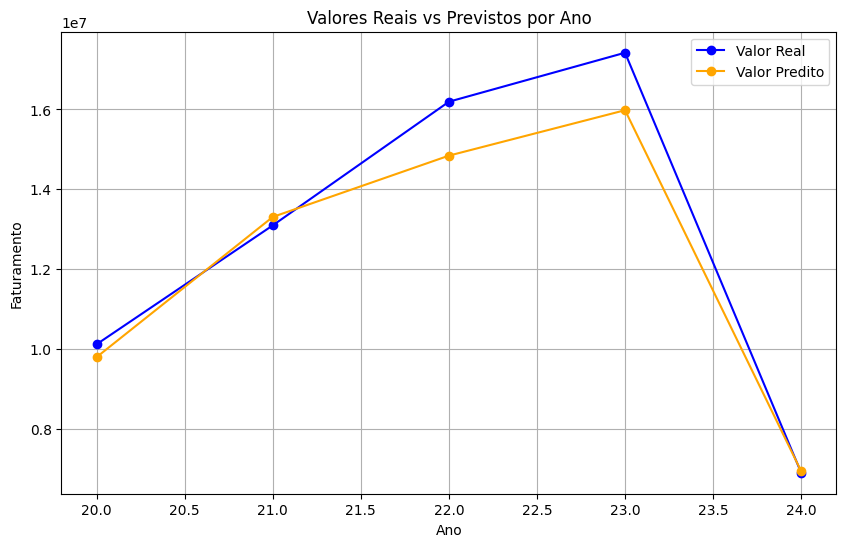

In [39]:
comparison_df = pd.DataFrame({
    'Ano': X_test['Ano'],
    'Valor Real': y_test,
    'Valor Predito': y_pred
})

grouped_df = comparison_df.groupby('Ano').sum()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df['Valor Real'], marker='o', linestyle='-', color='blue', label='Valor Real')
plt.plot(grouped_df.index, grouped_df['Valor Predito'], marker='o', linestyle='-', color='orange', label='Valor Predito')
plt.title('Valores Reais vs Previstos por Ano')
plt.xlabel('Ano')
plt.ylabel('Faturamento')
plt.grid(True)
plt.legend()
plt.show()


Gráfico 2: Valores Reais vs Previstos por Mês 

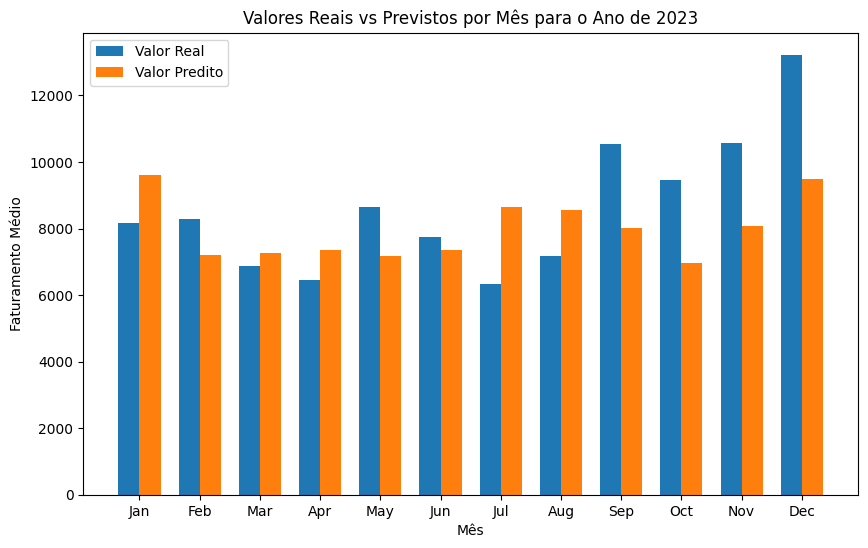

In [40]:
X_test['Ano'] = df.loc[X_test.index]['Ano']

# Criar um DataFrame com valores reais e previstos
comparison_df = pd.DataFrame({
    'Ano': X_test['Ano'],
    'Mês': X_test['Mês'],
    'Valor Real': y_test,
    'Valor Predito': y_pred
})

# Filtrar apenas o ano
comparison_df = comparison_df[comparison_df['Ano'] == 23]

grouped_df = comparison_df.groupby('Mês').mean()

fig, ax = plt.subplots(figsize=(10, 6))

indice_barras = np.arange(len(grouped_df))

largura = 0.35

# Plotar o gráfico de barras para valores reais e previstos
barras1 = ax.bar(indice_barras - largura/2, grouped_df['Valor Real'], largura, label='Valor Real')
barras2 = ax.bar(indice_barras + largura/2, grouped_df['Valor Predito'], largura, label='Valor Predito')

# Título e labels
ax.set_title('Valores Reais vs Previstos por Mês para o Ano de 2023')
ax.set_xlabel('Mês')
ax.set_ylabel('Faturamento Médio')
ax.set_xticks(indice_barras)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Legenda
ax.legend()

# Exibir o gráfico
plt.show()

#### Conclusão
Em suma, o modelo XGBoost apresenta uma taxa de acerto satisfatória e consegue lidar com uma ampla gama de valores de receita. As métricas de avaliação e os gráficos de análise demonstram sua capacidade de generalização e robustez. Apesar de alguns outliers, o modelo se mostra um forte candidato para ser o modelo preditivo oficial, com potencial para otimizar as previsões de receita e auxiliar na tomada de decisões.

## Modelo: Random Forest Regressor

O Random Forest Regressor é um algoritmo usado para resolver problemas de regressão em machine learning. Ele segue o conceito de ensemble learning, onde diversas árvores de decisão são geradas a partir de vários dados. Em vez de corrigir erros de modelos anteriores, como acontece em outros métodos, o Random Forest combina as previsões das árvores de forma agregada, tomando a média dos resultados. Isso ajuda a reduzir o risco de overfitting e melhora a precisão do modelo ao lidar com dados complexos e variados.

Para o projeto com a Gazeta, o Random Forest Regressor é uma ótima escolha, pois oferece boa precisão em problemas de regressão e lida bem com dados faltantes. Além disso, ele permite avaliar a importância das variáveis econômicas ou índices que mais influenciam a receita, o que pode ajudar a aprimorar o modelo preditivo, tornando possivelmente o Random Forest uma ferramenta útil para o projeto.

#### Carregamento dos Dados

In [42]:
#Carregando a base de dados do Excel
filename = 'data/tabela-rec.xlsx'
dados = pd.read_excel(filename)

#### Limpeza e Preparação dos Dados

In [43]:
#Transformando as variáveis categóricas em numéricas usando one-hot encoding
dados = pd.get_dummies(dados, drop_first=True)

#### Seleção de Variáveis

In [44]:
#Definindo as variáveis que vão ser usadas para treino e qual será prevista:
x = dados.drop(['Recorrência','Setor_encoded','UEN'], axis=1)
y = dados['Vl Liquido Final']

#Separando a base de dados entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

#### Treinamento das árvores

In [45]:
#Cria um modelo KNN e já manda ele aprender (fit) com os dados de treino.
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

#Gera várias árvores de decisão (50 ao todo), cada uma com uma seed diferente (random_state) pra garantir uma leve variação.
trees = []
for i in range(1, 51):
    tree = DecisionTreeRegressor(random_state=i)
    tree.fit(x_train, y_train)
    trees.append(('tree' + str(i), tree))

#Adiciona o modelo KNN na lista junto com as árvores de decisão.
trees.append(('knn', knn))

#Cria um "voto rígido" com todos os modelos (KNN + árvores) e treina ele nos dados.
vot_hard = VotingRegressor(estimators=trees)
vot_hard.fit(x_train, y_train)

#Faz uma previsão com o KNN pros primeiros 10 exemplos do teste.
knn.predict(x_test[:10])

#Repete a ideia do "vot_hard", mas dessa vez seria um "voto suave" (mais influente no resultado final, talvez).
vot_soft = VotingRegressor(estimators=trees)
vot_soft.fit(x_train, y_train)

#Cria um modelo de stacking, usando as árvores e o KNN, e define uma árvore de decisão como o modelo final pra empilhar (combinar) os resultados.
stacking = StackingRegressor(estimators=trees, final_estimator=DecisionTreeRegressor())
stacking.fit(x_train, y_train)

StackingRegressor(estimators=[('tree1', DecisionTreeRegressor(random_state=1)),
                              ('tree2', DecisionTreeRegressor(random_state=2)),
                              ('tree3', DecisionTreeRegressor(random_state=3)),
                              ('tree4', DecisionTreeRegressor(random_state=4)),
                              ('tree5', DecisionTreeRegressor(random_state=5)),
                              ('tree6', DecisionTreeRegressor(random_state=6)),
                              ('tree7', DecisionTreeRegressor(r...
                               DecisionTreeRegressor(random_state=24)),
                              ('tree25',
                               DecisionTreeRegressor(random_state=25)),
                              ('tree26',
                               DecisionTreeRegressor(random_state=26)),
                              ('tree27',
                               DecisionTreeRegressor(random_state=27)),
                              ('tree28',
                               DecisionTreeRegressor(random_state=28)),
                              ('tree29',
                               DecisionTreeRegressor(random_state=29)),
                              ('tree30',
                               DecisionTreeRegressor(random_state=30)), ...],
                  final_estimator=DecisionTreeRegressor())

#### Modelagem com Random Forest

In [46]:
#Agora entra a Random Forest, com 50 árvores, já configurada pra usar 7 features por árvore e calcular o out-of-bag score (pra medir desempenho).
model = RandomForestRegressor(n_estimators=50, random_state=0, oob_score=True, max_features=7)
model.fit(x_train, y_train)

#Faz previsões usando o modelo Random Forest com os dados de teste.
y_pred = model.predict(x_test)

#Calcula o residual entre as previsões e o valor real, converte pra porcentagem, e arredonda com duas casas decimais.
residuals = y_pred/y_test
residuals *= 100
residuals = residuals.round(2)

train_sizes, train_scores, test_scores = learning_curve(model, x, y, cv=5)

train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

#### Métricas

In [47]:
#Métricas que usamos para medir a precisão desse modelo

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
smape = 100/len(y_test) * np.sum(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))
accuracy = model.score(x_test, y_test)
soma = 0
for item in residuals:
  soma += item

print(f'{round(soma/len(residuals), 2)}%')
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse, 2)}")
print(f"R²: {round(r2, 6)}")
print(f"Symmetric Mean Absolute Percentage Error (sMAPE): {round(smape, 2)}%")
print(f"Accuracy: {round(accuracy, 2)}")

246.61%
Mean Squared Error (MSE): 71538641.94
Mean Absolute Error (MAE): 1525.55
Root Mean Squared Error (RMSE): 8458.05
R²: 0.898425
Symmetric Mean Absolute Percentage Error (sMAPE): 29.92%
Accuracy: 0.9


#### Explicabilidade

In [ ]:
#Cria um objeto explainer SHAP para modelos baseados em árvore
explainer = shap.TreeExplainer(model) 

#100% dos dados para calcular os valores SHAP
x_sample = x.sample(frac=1, random_state=42)  
shap_values_sample = explainer.shap_values(x_sample)

#Define um valor de teste específico para explicar 
valor_teste = np.array([[23488, 38, 0, 1, 20]]) 

#Calcula os valores SHAP para o valor de teste
shap_values = explainer.shap_values(valor_teste)

In [ ]:
#Gráfico de força
shap.force_plot(explainer.expected_value, shap_values[0], valor_teste, matplotlib=True)
plt.show()

<img src="../assets/graficos/forcaRF.png" alt="Gráfico de força" />

In [ ]:
#Gráfico de resumo
shap.summary_plot(shap_values_sample, x_sample)
plt.show()

<img src="../assets/graficos/resumoRF.png" alt="Gráfico de resumo" />

In [ ]:
#Gráfico de dependência
shap.dependence_plot('Setor_encoded', shap_values_sample, x_sample)
plt.show()

<img src="../assets/graficos/dependenciaRF.png" alt="Gráfico de dependência" />

### Hiperparâmetros

In [ ]:
# Importa a classe GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define a grade de hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_depth': [10, 20, 30],      # Profundidade máxima de cada árvore
    'max_features': ['sqrt', 'log2', None],  # Número de features consideradas para cada divisão
}

# Cria o objeto GridSearchCV com o modelo, grade de parâmetros e configurações
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, scoring='r2', verbose=1)
grid_search.fit(x_train, y_train)

# Ajusta o GridSearchCV aos dados de treinamento
grid_search.fit(x_train, y_train)

# Imprime os melhores hiperparâmetros encontrados
print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")

### Visualização dos Resultados

Gráfico 1: Criação de um gráfico do Valor Real X Porcentagem de acurácia com limitações para melhor visualização da precisão das predições

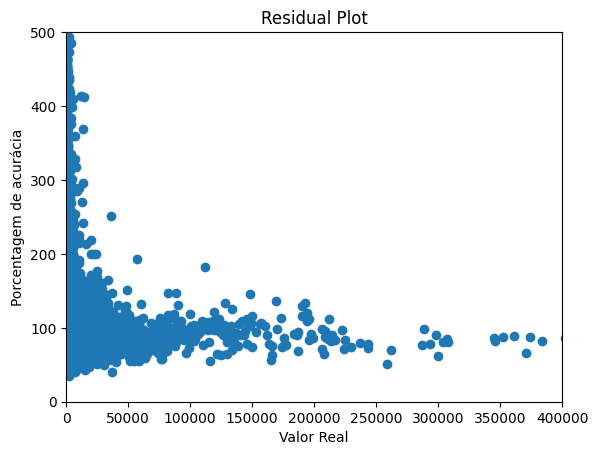

In [48]:

plt.scatter(y_test, residuals)
plt.xlabel("Valor Real")
plt.xlim(0,400000)
plt.ylabel("Porcentagem de acurácia")
plt.ylim(0,500)
plt.title("Residual Plot")
plt.show()

## Modelo: Sarimax

#### Carregamento dos Dados

In [49]:
# Carrega o arquivo Excel
file_path = 'data/tabela_agosto_final.xlsx'
df = pd.read_excel(file_path)

#### Limpeza e Preparação dos Dados

In [50]:
# Substitui espaços por sublinhados nos nomes das colunas
df.columns = df.columns.str.replace(' ', '_')

# Ajusta o formato do 'Ano' para 2020-2024
df['Ano'] = df['Ano'] + 2000

# Filtra meses inválidos (Mês entre 1 e 12)
df = df[(df['Mês'] >= 1) & (df['Mês'] <= 12)]

# Cria a coluna 'data' a partir de 'Ano' e 'Mês'
df['data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mês'].astype(str) + '-01', format='%Y-%m-%d', errors='coerce')

# Remove linhas com datas inválidas
df = df.dropna(subset=['data'])

# Ordena o DataFrame pela coluna 'data'
df = df.sort_values(by='data')

# Reseta o índice
df = df.reset_index(drop=True)

# Remove linhas com dados ausentes nas colunas usadas
df = df.dropna(subset=['Ano', 'VL_Tabela', 'Mês', '%_Ating._Meta', 'Recorrência'])

#### Seleção de Variáveis

Neste bloco são selecionadas as features explicativas e a variável alvo, ou seja, o que pretende-se prever, que neste caso é 'Vl_Liquido_Final'. Em seguida, os dados são divididos em conjuntos de treino e teste.

In [51]:
# Seleciona as variáveis explicativas e a variável alvo
X = df[['Mês', 'VL_Tabela', 'Setor_encoded', 'UEN', 'Veiculo_encoded', 'Recorrência', '%_Ating._Meta']]
y = df['Vl_Liquido_Final']

# Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

#### Hiperparâmetros

Nesta célula ocorre a geração de combinações dos possíveis parâmetros order e seasonal_order, que são usados par ajustar o modelo

In [52]:
# Função para ajustar o modelo SARIMAX
def sarimax_model(order, seasonal_order):
    model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    return model_fit

Aqui ocorre a busca aleatória dos hiperparâmetros, onde são testadas diferentes combinações de parâmetros para encontrar a combinação mais adequada para o modelo

In [53]:
# Define os parâmetros a serem testados
param_distributions = {
    'order': list(product(range(0, 3), repeat=3)),  # p, d, q de 0 a 2
    'seasonal_order': list(product(range(0, 2), repeat=3)) + [(0, 0, 0, 12)]  # P, D, Q com sazonalidade de 12
}

#### Modelagem com Sarimax
Após encontrar os melhores parâmetros para o modelo, são feitas as previsões sobre o conjunto de teste

In [54]:
# Inicializa as variáveis para o melhor modelo
best_model = None
best_score = float('inf')
best_order = None
best_seasonal_order = None

# Realiza a busca aleatória
for _ in range(50):  # Número de iterações aleatórias
    order = param_distributions['order'][np.random.choice(len(param_distributions['order']))]
    seasonal_order = param_distributions['seasonal_order'][np.random.choice(len(param_distributions['seasonal_order']))]

    try:
        model_fit = sarimax_model(order, seasonal_order)
        aic = model_fit.aic
        
        # Atualiza o melhor modelo se o AIC atual for menor
        if aic < best_score:
            best_score = aic
            best_model = model_fit
            best_order = order
            best_seasonal_order = seasonal_order

    except Exception as e:
        continue  # Ignora combinações que não podem ser ajustadas

    # Exibe os melhores parâmetros
print(f"Melhor order: {best_order}")
print(f"Melhor seasonal_order: {best_seasonal_order}")


Melhor order: (2, 0, 0)
Melhor seasonal_order: (0, 0, 0, 12)


#### Previsões e Avaliação do Modelo

In [55]:
# Faz previsões para o conjunto de teste
y_pred = best_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Calcula as métricas de erro
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(mse)
r2 = 1 - (mse / np.var(y_test))
smape = 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))

# Exibe as métricas
print(f"\nMétricas de Erro:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"(sMAPE): {smape}%")


Métricas de Erro:
MSE: 60926188.6366
MAE: 2436.7764
RMSE: 7805.5230
R²: 0.8998
(sMAPE): 59.552718215846234%


Em seguida são comparados os valores previstos e reais em um dataframe com as datas

In [73]:
# Criando um DataFrame simples com 'data', valores reais e valores previstos
comparison_df = pd.DataFrame({
    'Data': df['data'].iloc[len(y_train):len(y_train) + len(y_test)],  # Use df para a coluna 'data'
    'Valor Real': y_test,
    'Valor Predito': y_pred
})


#### Visualização dos Resultados

Por fim, são plotados os gráficos de comparação de valores reais e previstos, de resíduos e de dispersão 

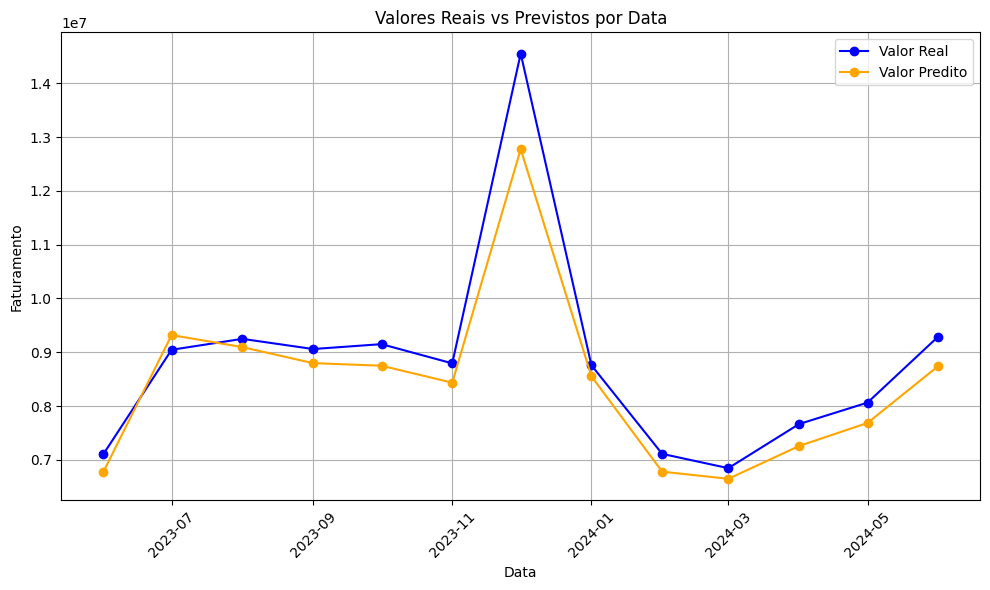

In [75]:
# Criando um DataFrame simples com 'data', valores reais e valores previstos
comparison_df = pd.DataFrame({
    'Data': df['data'].iloc[len(y_train):len(y_train) + len(y_test)],  # Acesso à coluna 'data' no DataFrame correto
    'Valor Real': y_test,
    'Valor Predito': y_pred
})

# Agrupando por 'data' e somando os valores
grouped_df = comparison_df.groupby('Data').sum().reset_index()

# Definindo o gráfico de linhas
plt.figure(figsize=(10, 6))

# Plotando os valores reais
plt.plot(grouped_df['Data'], grouped_df['Valor Real'], marker='o', linestyle='-', color='blue', label='Valor Real')

# Plotando os valores previstos
plt.plot(grouped_df['Data'], grouped_df['Valor Predito'], marker='o', linestyle='-', color='orange', label='Valor Predito')

# Definindo título e labels
plt.title('Valores Reais vs Previstos por Data')
plt.xlabel('Data')
plt.ylabel('Faturamento')

# Ajustando o formato das datas no eixo X
plt.xticks(rotation=45)

# Exibindo a grade, legenda e o gráfico
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


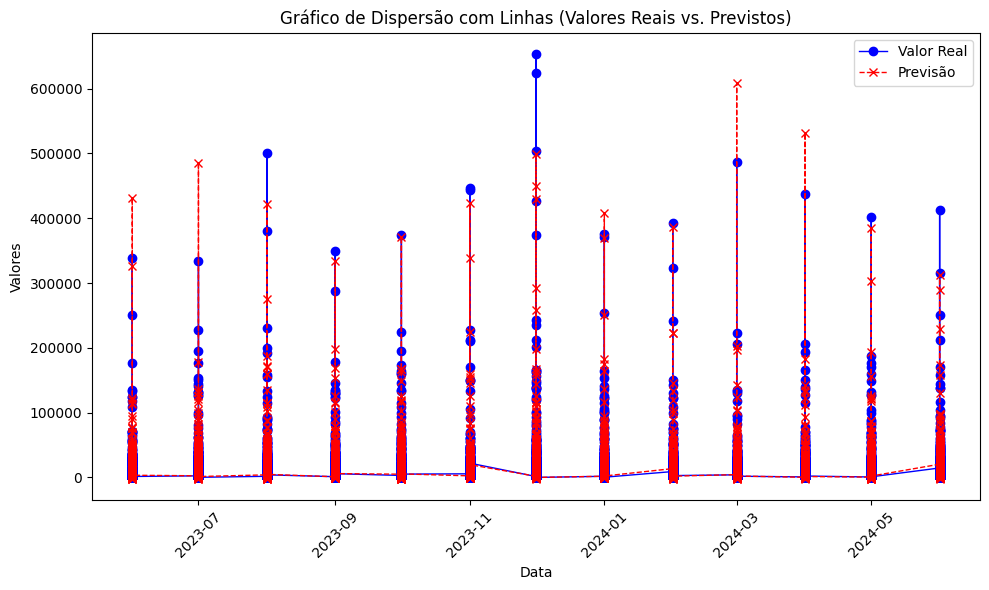

In [76]:
# Gráfico de dispersão com linhas para valores reais e previstos
plt.figure(figsize=(10, 6))

# Gráfico de linhas com pontos para os valores reais e previstos
plt.plot(pred_df['Data'], pred_df['Valor Real'], label='Valor Real', color='blue', marker='o', linestyle='-', linewidth=1)
plt.plot(pred_df['Data'], pred_df['Previsão'], label='Previsão', color='red', marker='x', linestyle='--', linewidth=1)

# Títulos e rótulos
plt.title('Gráfico de Dispersão com Linhas (Valores Reais vs. Previstos)')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()

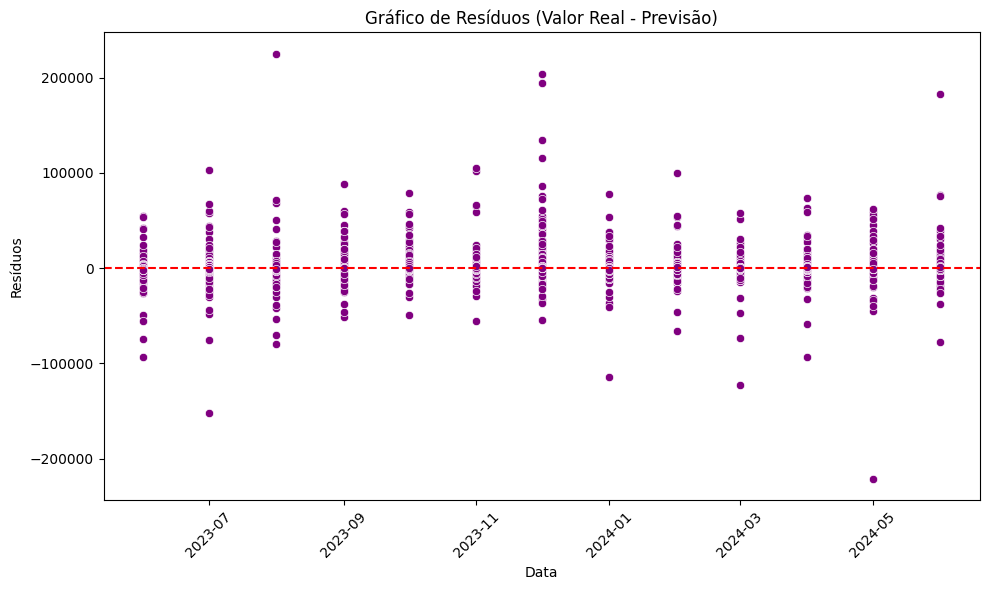

In [77]:
# Calcula os resíduos
pred_df['Resíduos'] = pred_df['Valor Real'] - pred_df['Previsão']

# Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pred_df['Data'], y=pred_df['Resíduos'], color='purple')

# Adiciona uma linha horizontal para marcar o zero
plt.axhline(0, color='red', linestyle='--')

# Títulos e rótulos
plt.title('Gráfico de Resíduos (Valor Real - Previsão)')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibe o gráfico
plt.show()

## Modelo: Keras

#### Carregamento dos Dados

O código começa carregando os dados de uma planilha Excel usando a função pd.read_excel. A variável df contém o dataset completo.

In [80]:
# Carregar os dados
df = pd.read_excel('data/tabela_agosto_final.xlsx') 

#### Seleção de Variáveis

X: Conjunto de variáveis preditoras, que incluem dados como recorrência, ano, mês, valores e variáveis codificadas.

y: Variável alvo, que neste caso é o valor "Vl Liquido Final".

Os dados são divididos em conjunto de treino (80%) e teste (20%) usando a função train_test_split, garantindo uma separação aleatória e reprodutível, E para garantir que os dados estejam na mesma escala, as variáveis preditoras são normalizadas usando StandardScaler.

In [81]:
# Definir as variáveis preditoras e a variável alvo
X = df[['Recorrência', 'Ano', 'Mês', 'IPCA ES', 'VL Tabela',
        'Veiculo_encoded', 'Origem_encoded', 'Segmento_encoded', 'Setor_encoded']]
y = df['Vl Liquido Final']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as variáveis preditoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Modelagem com Keras

A rede neural é criada usando o Keras com a API Sequential. Ela possui:

- 3 camadas densas escondidas com 64, 32 e 16 neurônios, todas com ativação relu.
- Regularização L2 para evitar overfitting.
- Camada de dropout (0.5) para desativar metade dos neurônios aleatoriamente durante o treinamento.
- Camada de saída com 1 neurônio para a previsão da variável contínua.

O modelo é treinado por 100 épocas com um tamanho de lote de 32. Os dados de validação são passados para monitorar o desempenho.

In [ ]:
# Criar o modelo de rede neural
model = Sequential()

# Adicionar camadas da rede neural
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))  # Camada de saída para prever a receita

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

#### Previsões e Avaliação do Modelo

O modelo faz previsões com base nos dados de teste. Várias métricas de desempenho, citadas anteriormente, são então calculadas para avaliar a qualidade do modelo

In [ ]:
# Avaliar o modelo no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Avaliar o modelo
loss = model.evaluate(X_test_scaled, y_test)
print(f'Perda (MSE) no conjunto de teste: {loss}')

# Cálculo das métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Erro Médio Relativo (MRE)
mre = np.mean(np.abs((y_test - y_pred.flatten()) / y_test))

# Ensure both arrays are 1D for SMAPE calculation
smape = 100/len(y_test) * np.sum(2 * np.abs(y_pred.flatten() - y_test) / (np.abs(y_test) + np.abs(y_pred.flatten())))

# Exibir as métricas
print(f'MAE (Mean Absolute Error): {mae}')
print(f'MSE (Mean Squared Error): {mse}')
print(f'RMSE (Root Mean Squared Error): {rmse}')
print(f'R² (Coeficiente de Determinação): {r2}')
print(f'MRE (Mean Relative Error): {mre}')
print(f'SMAPE (Symmetric Mean Absolute Percentage Error): {smape}')

#### Visualização dos Resultados

Para facilitar a interpretação dos resultados, um gráfico de dispersão é gerado para comparar os valores reais e previstos no conjunto de treino. Uma linha de referência 
y=x é adicionada para indicar previsões perfeitas.

In [ ]:
# Fazer as previsões no conjunto de treino
y_train_pred = model.predict(X_train_scaled)

# Criar a figura
plt.figure(figsize=(8, 6))

# Scatter plot dos valores reais e previstos
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Valores Reais vs Previstos')

# Adicionar uma linha de referência y = x (indica previsões perfeitas)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label='Previsão Perfeita (y = x)')

# Adicionar títulos e rótulos aos eixos
plt.title('Comparação de Valores Reais e Preditos com Linha de Previsão Perfeita')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

# Adicionar legenda explicativa
plt.legend(loc='upper left', fontsize=10)

# Melhorar a visualização do grid
plt.grid(True)

# Exibir o gráfico
plt.show()

## Comparação Entre Modelos

A avaliação de modelos de machine learning serve para entender seu desempenho e eficácia na resolução de problemas específicos. Por isso, utilizamos cinco métricas, R², MSE, MAE, RMSE e sMAPE, e obtivemos os resultados expostos na tabela a seguir. Cada uma dessas métricas oferece uma perspectiva única sobre a precisão e a capacidade preditiva dos modelos.

| Modelos/Métricas | R²   | MSE              | MAE      | RMSE      | sMAPE   |
|------------------|------|------------------|----------|-----------|---------|
| Random Forest     | 8,9% | 641.470.746,04   | **7.985,84** | 25.327,27 | 94,64%  |
| Sarimax           | 89%  | 60.931.982,35    | 2.436,83 | 7.805,89  | **59%** |
| Rede Neural       | 83%  | 81.648.271,11    | 2.150,96 | 9.035,94  | **42,75%** |
| XGBoost           | 13,9%| 373.303.977,19   | 6.956,02 | **19.321,08** | 91,25%  |


Para facilitar a interpretação dos resultados, a visualização dessas métricas em gráficos comparativos não apenas torna mais clara a performance dos modelos, mas também auxilia na escolha do mais adequado para a aplicação em questão. A seguir, apresentamos os gráficos que ilustram a performance dos modelos de machine learning avaliados, permitindo uma análise clara e concisa das métricas selecionadas.

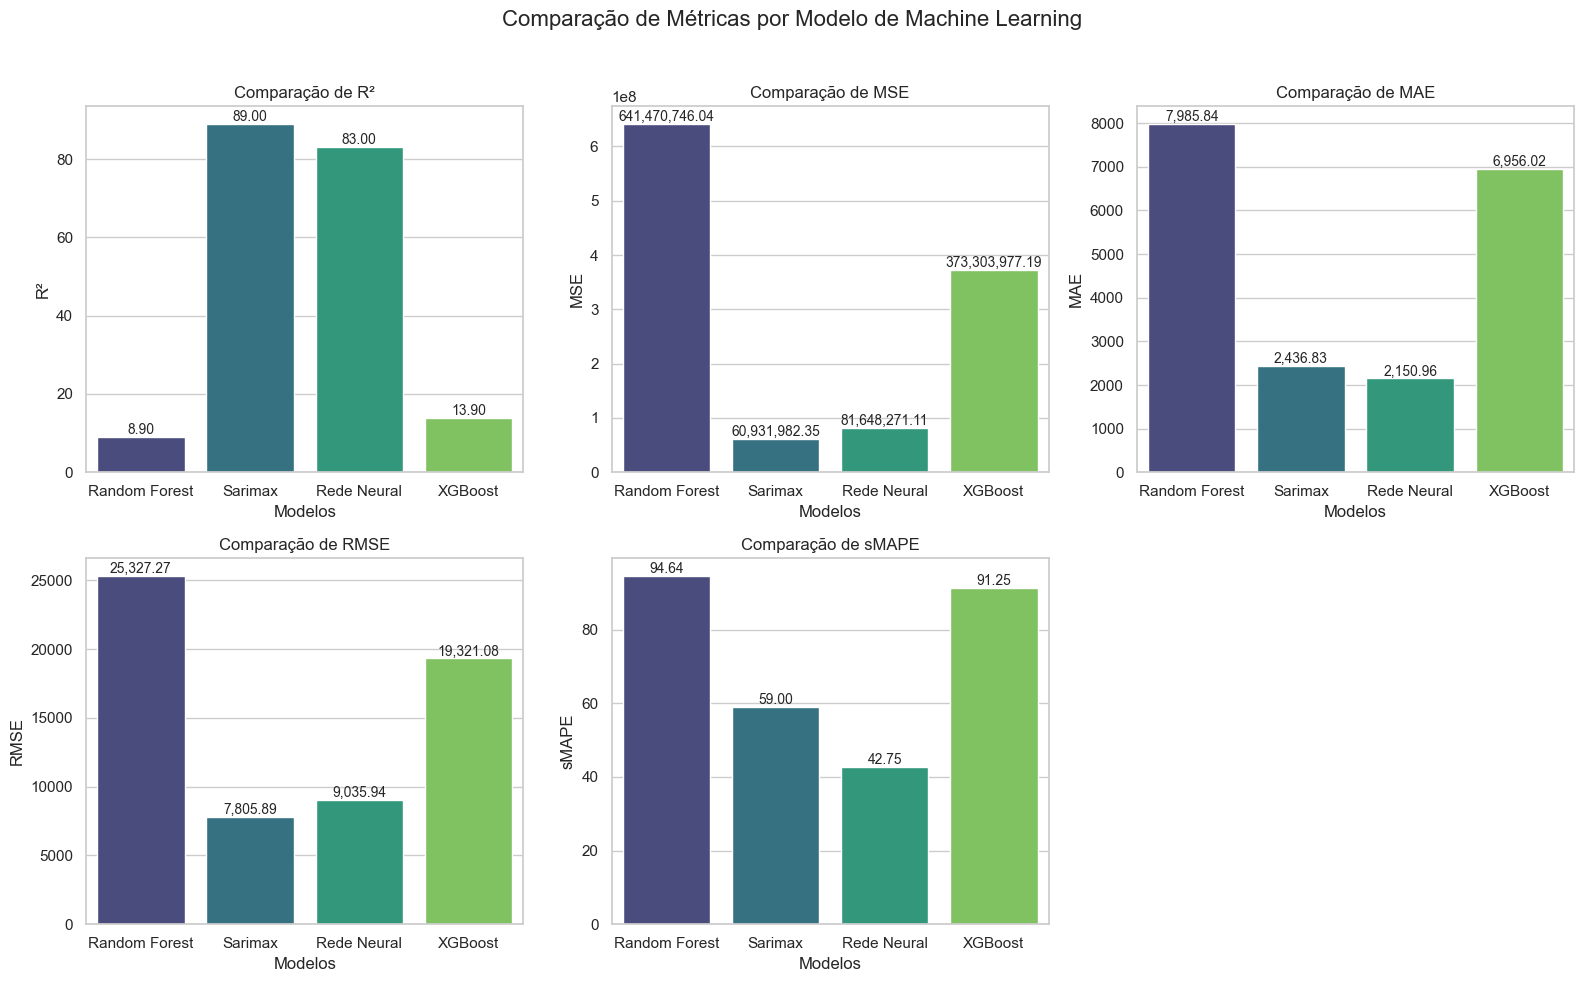

In [82]:
# Dados da tabela
data = {
    'Modelos': ['Random Forest', 'Sarimax', 'Rede Neural', 'XGBoost'],
    'R²': [8.9, 89, 83, 13.9],
    'MSE': [641470746.04, 60931982.35, 81648271.11, 373303977.19],
    'MAE': [7985.84, 2436.83, 2150.96, 6956.02],
    'RMSE': [25327.27, 7805.89, 9035.94, 19321.08],
    'sMAPE': [94.64, 59, 42.75, 91.25]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Configuração do estilo do gráfico e paleta de cores
sns.set(style="whitegrid", palette="viridis")

# Criar um subplot para cada métrica (5 gráficos em um layout 2x3)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Duas linhas, três colunas
fig.suptitle('Comparação de Métricas por Modelo de Machine Learning', fontsize=16)

# Lista de métricas para plotar
metrics = ['R²', 'MSE', 'MAE', 'RMSE', 'sMAPE']

# Gerar gráficos para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]  # Determina a posição do gráfico (2 linhas x 3 colunas)
    barplot = sns.barplot(x='Modelos', y=metric, data=df, ax=ax, hue='Modelos', dodge=False, palette="viridis", legend=False)
    ax.set_title(f'Comparação de {metric}')
    ax.set_ylabel(metric)

    # Adiciona os números em cima das barras
    for p in barplot.patches:
        ax.annotate(f'{p.get_height():,.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10)

# Remover o gráfico vazio na última posição (2x3 layout tem 6 posições, só usamos 5)
axes[1, 2].axis('off')  # Desativa o gráfico vazio

# Ajuste do layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Com base nessas métricas, torna-se possível ponderar o modelo que apresenta um melhor desempenho, facilitando portanto a decisão de onde aplicaremos a atenção nos próximos passos para propor a melhor solução para o problema em questão.

## Modelo Final

### Modelo SARIMAX Geral

O modelo SARIMAX é um modelo para previsões em séries temporais, combinando autoregressão, média móvel e diferenciação sazonal. Ele se destaca por lidar bem com dados que possuem tendências, sazonalidades e fatores externos, tornando-o ideal para prever receitas financeiras. Além de capturar padrões temporais complexos, o SARIMAX também pode incorporar variáveis externas que afetam o comportamento da receita, permitindo previsões mais precisas e ajustadas ao contexto do negócio.

#### Carregamento de Dados
É carregada a tabela com os dados que serão utilizados para o treinamento do modelo

In [83]:
df = pd.read_excel('data/tabela_data_sarimax.xlsx')

### Limpeza de Dados 
Os dados são preparados para garantir que as colunas estão no formato correto, não há valores nulos e todas as colunas estão no formato correto

In [84]:
# Converte as colunas numéricas que têm vírgulas para o formato correto
df.loc[:,'Taxa_Ac._TRI_%_PIB'] = df['Taxa_Ac._TRI_%_PIB'].str.replace(',', '.').astype(float)

In [85]:
# Carregar e preparar os dados
df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)

In [86]:
# Trata valores ausentes
df['Vl_Liquido_Final'] = df['Vl_Liquido_Final'].fillna(df['Vl_Liquido_Final'].mean())
df['IPCA_ES'] = df['IPCA_ES'].fillna(df['IPCA_ES'].mean())
df['IPCA_BR'] = df['IPCA_BR'].fillna(df['IPCA_BR'].mean())
df['Taxa_Ac._TRI_%_PIB'] = df['Taxa_Ac._TRI_%_PIB'].fillna(df['Taxa_Ac._TRI_%_PIB'].mean())

# Converta as colunas para o tipo numérico se necessário
df['Vl_Liquido_Final'] = pd.to_numeric(df['Vl_Liquido_Final'], errors='coerce')
df['IPCA_ES'] = pd.to_numeric(df['IPCA_ES'], errors='coerce')
df['IPCA_BR'] = pd.to_numeric(df['IPCA_BR'], errors='coerce')
df['Taxa_Ac._TRI_%_PIB'] = pd.to_numeric(df['Taxa_Ac._TRI_%_PIB'], errors='coerce')

#### Agrupamento dos dados por data

In [87]:
# Agrupa os dados por data (mês) e calcula as métricas especificadas para cada coluna
df_geral = df.resample('ME').agg({
    'IPCA_ES': 'mean',          # Calcula a média de IPCA_ES
    'IPCA_BR': 'mean',          # Calcula a média de IPCA_BR
    'Vl_Liquido_Final': 'sum',  # Soma Vl_Liquido_Final, você pode mudar se necessário
    'Taxa_Ac._TRI_%_PIB': 'mean',  # Calcula a média de Taxa_Ac._TRI_%_PIB
}).reset_index()

In [88]:
df_geral['data'] = pd.to_datetime(df_geral['data'])
df_geral.set_index('data', inplace=True)

In [89]:
# Define a frquencia do índice
df_geral = df_geral.asfreq('ME')

#### Definindo as features
São adicionadas as variáveis que serão usadas no treinamento do modelo para as previsões

In [90]:
#Variáveis de treinamento e Variável Alvo 
X = df_geral[['IPCA_ES', 'IPCA_BR', 'Taxa_Ac._TRI_%_PIB']]
y = df_geral['Vl_Liquido_Final']

#Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#### Treinando o modelo
É implementado o modelo, ajustando os dados de treinamento e realizando previsões com base nas variáveis. As métricas de avaliação, como MSE, MAE, R² e SMAPE, são calculadas para medir a precisão das previsões no conjunto de teste. Além disso, o código gera previsões futuras para os próximos meses, utilizando a média dos dados passados para as variáveis exógenas.

In [91]:
# Ajustar o modelo SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Sazonalidade mensal
model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Fazer previsões
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular SMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100

# Exibir as métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'SMAPE: {smape}')

n_months = 24

# Garantir que o índice é do tipo datetime
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index)

# Obter a última data corretamente
last_date = df.index[-1]  # Última data do DataFrame

# Verificar se a última data está no formato datetime
if not isinstance(last_date, pd.Timestamp):
    raise ValueError("A última data não é um objeto datetime")

# Gerar datas futuras com frequência mensal (ME: final de mês)
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='ME')

# Preencher as variáveis exógenas futuras com base na média dos dados passados
future_X = pd.DataFrame(index=future_dates)
for col in X.columns:
    future_X[col] = X[col].mean()

# Fazer previsões futuras
future_predictions = model_fit.predict(start=len(y_train), end=len(y_train) + n_months - 1, exog=future_X)

print("n\ Previsões futuras para o próximo ano:")
print(future_predictions)

MSE: 1710952976741.103
MAE: 1094210.4721999636
R²: 0.5507755899373126
SMAPE: 12.07295444205791
n\ Previsões futuras para o próximo ano:
2023-08-31    1.043805e+07
2023-09-30    9.447235e+06
2023-10-31    9.436095e+06
2023-11-30    1.122122e+07
2023-12-31    1.516238e+07
2024-01-31    9.207835e+06
2024-02-29    7.681059e+06
2024-03-31    9.024962e+06
2024-04-30    9.463246e+06
2024-05-31    1.003579e+07
2024-06-30    1.086300e+07
2024-07-31    1.055759e+07
2024-08-31    1.167019e+07
2024-09-30    1.070488e+07
2024-10-31    1.063380e+07
2024-11-30    1.243872e+07
2024-12-31    1.636511e+07
2025-01-31    1.047173e+07
2025-02-28    8.989311e+06
2025-03-31    1.029501e+07
2025-04-30    1.074364e+07
2025-05-31    1.125416e+07
2025-06-30    1.221267e+07
2025-07-31    1.186520e+07
Freq: ME, Name: predicted_mean, dtype: float64


### Modelo SARIMAX por UEN
Também foi implementado um modelo separado por UEN

In [92]:
# Defina o veículo pelo qual deseja filtrar
uen_digital = 0
uen_televisao = 1
uen_radio = 2

#### Radio
O primeiro modelo separado por UEN implementado foi o rádio

##### Filtragem e Agrupamento de Dados por Veículo e Mês

In [93]:
# Filtra o DataFrame pelo veículo especificado
df_filtrado = df[df['UEN'] == uen_radio]

In [94]:
# Agrupa os dados por data (mês) e calcula as métricas especificadas para cada coluna
df_filtrado = df_filtrado.resample('ME').agg({
    'IPCA_ES': 'mean',          # Calcula a média de IPCA_ES
    'IPCA_BR': 'mean',          # Calcula a média de IPCA_BR
    'Vl_Liquido_Final': 'sum',  # Soma Vl_Liquido_Final, você pode mudar se necessário
    'Taxa_Ac._TRI_%_PIB': 'mean',  # Calcula a média de Taxa_Ac._TRI_%_PIB
}).reset_index()

# Exibe as primeiras linhas do dataframe agrupado
print(df_filtrado.head())

        data  IPCA_ES  IPCA_BR  Vl_Liquido_Final  Taxa_Ac._TRI_%_PIB
0 2020-01-31     0.29     0.21         819268.49                 1.1
1 2020-02-29     0.33     0.25         985286.15                 1.1
2 2020-03-31     0.12     0.07         698138.91                 1.1
3 2020-04-30    -0.09    -0.31         438250.43                -1.7
4 2020-05-31    -0.48    -0.38         360395.43                -1.7


In [95]:
df_filtrado['data'] = pd.to_datetime(df_filtrado['data'])
df_filtrado.set_index('data', inplace=True)

In [96]:
# Define a frquencia do índice
df_filtrado = df_filtrado.asfreq('ME')

##### Seleção de Variáveis

In [97]:
# Variáveis exógenas e a variável alvo (exemplo)
X = df_filtrado[['IPCA_ES', 'IPCA_BR', 'Taxa_Ac._TRI_%_PIB']]  # Colunas exógenas
y = df_filtrado['Vl_Liquido_Final']  # Coluna alvo

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

##### Modelagem 

In [99]:
# Ajustar o modelo SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Sazonalidade mensal
model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Fazer previsões
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular SMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100

# Exibir as métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'SMAPE: {smape}')

n_months = 24

# Garantir que o índice é do tipo datetime
if not isinstance(df_filtrado.index, pd.DatetimeIndex):
    df_filtrado.index = pd.to_datetime(df_filtrado.index)

# Obter a última data corretamente
last_date = df_filtrado.index[-1]  # Última data do DataFrame

# Verificar se a última data está no formato datetime
if not isinstance(last_date, pd.Timestamp):
    raise ValueError("A última data não é um objeto datetime")

# Gerar datas futuras com frequência mensal (ME: final de mês)
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='ME')

# Preencher as variáveis exógenas futuras com base na média dos dados passados
future_X = pd.DataFrame(index=future_dates)
for col in X.columns:
    future_X[col] = X[col].mean()

# Fazer previsões futuras
future_predictions = model_fit.predict(start=len(y_train), end=len(y_train) + n_months - 1, exog=future_X)

print("Previsões futuras para o próximo ano:")
print(future_predictions)

MSE: 51021361913.021805
MAE: 215505.70743284578
R²: 0.3883346294490845
SMAPE: 16.260513288270925
Previsões futuras para o próximo ano:
2023-08-31    1.413110e+06
2023-09-30    1.223555e+06
2023-10-31    1.253524e+06
2023-11-30    1.566547e+06
2023-12-31    1.876575e+06
2024-01-31    1.317972e+06
2024-02-29    1.199769e+06
2024-03-31    1.359026e+06
2024-04-30    1.223115e+06
2024-05-31    1.334227e+06
2024-06-30    1.511964e+06
2024-07-31    1.377205e+06
2024-08-31    1.663169e+06
2024-09-30    1.462344e+06
2024-10-31    1.530430e+06
2024-11-30    1.854782e+06
2024-12-31    2.150092e+06
2025-01-31    1.512447e+06
2025-02-28    1.380241e+06
2025-03-31    1.578271e+06
2025-04-30    1.440068e+06
2025-05-31    1.584085e+06
2025-06-30    1.724803e+06
2025-07-31    1.581014e+06
Freq: ME, Name: predicted_mean, dtype: float64


##### Visualização dos dados
Para melhor análise do desempenho do modelo, foram plotados gráficos de previsões futuras e previsões reais

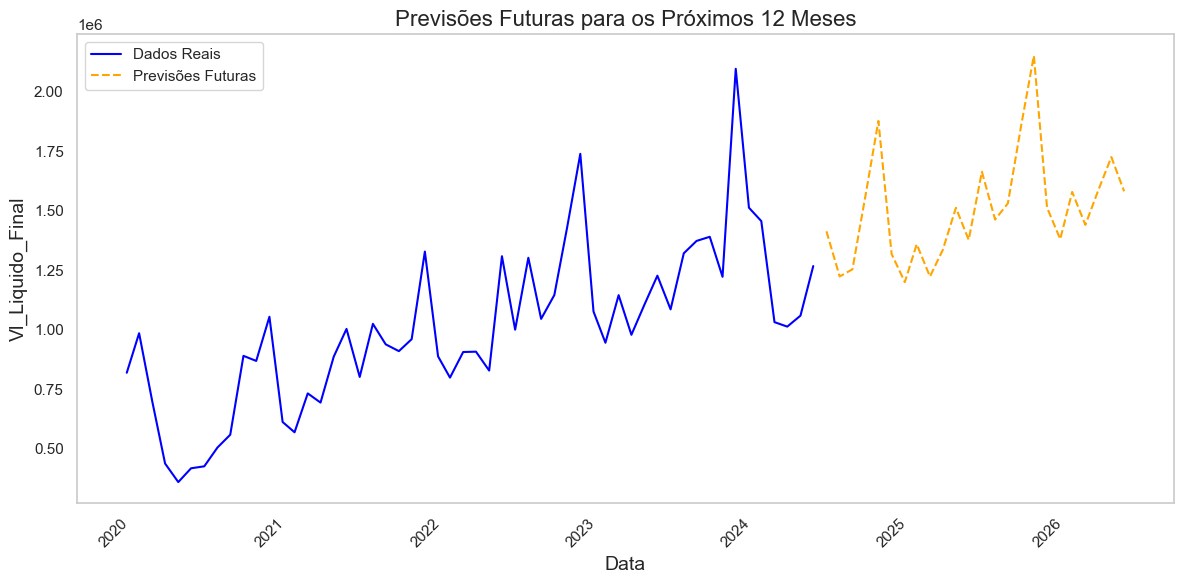

In [100]:
# Criar DataFrame para as previsões futuras
future_df = pd.DataFrame({'Data': future_dates, 'Previsões': future_predictions})
future_df.set_index('Data', inplace=True)

# Plotar os dados reais e as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado.index, df_filtrado['Vl_Liquido_Final'], label='Dados Reais', color='blue')

# Limitar o gráfico a apenas 12 meses a partir da última data
plt.plot(future_df.index, future_df['Previsões'], label='Previsões Futuras', color='orange', linestyle='--')

# Adicionar título e rótulos aos eixos
plt.title('Previsões Futuras para os Próximos 12 Meses', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vl_Liquido_Final', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

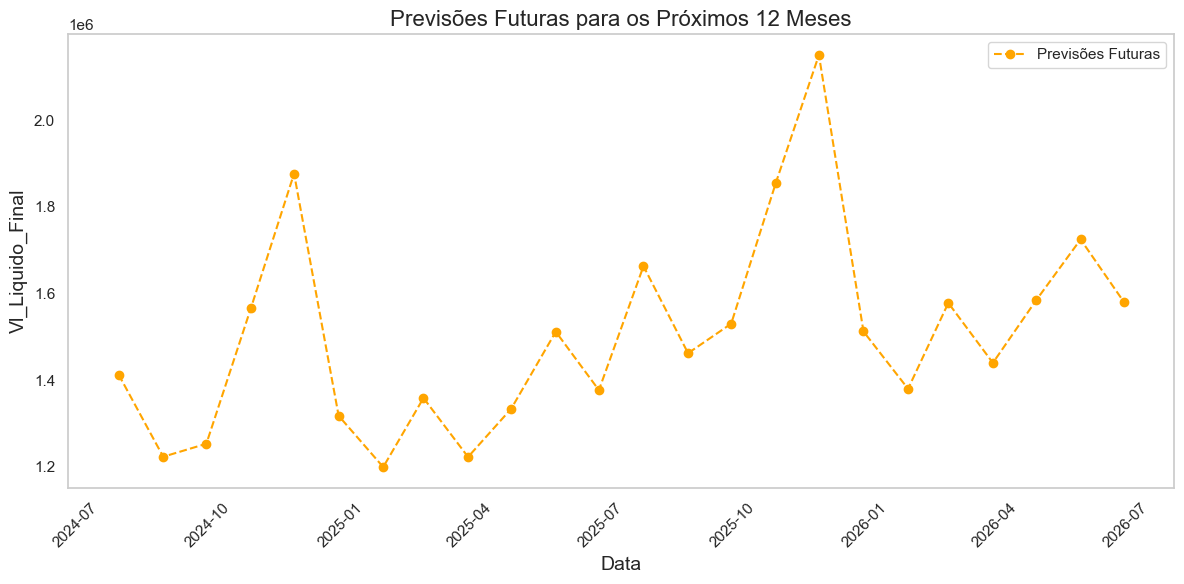

In [101]:
# Criar DataFrame para as previsões futuras
future_df = pd.DataFrame({'Data': future_dates, 'Previsões': future_predictions})
future_df.set_index('Data', inplace=True)

# Plotar apenas as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(future_df.index, future_df['Previsões'], label='Previsões Futuras', color='orange', linestyle='--', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Previsões Futuras para os Próximos 12 Meses', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vl_Liquido_Final', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Digital

##### Filtragem e Agrupamento de Dados por Veículo e Mês

In [102]:
# Filtra o DataFrame pelo veículo especificado
df_filtrado = df[df['UEN'] == uen_digital]

In [103]:
# Agrupa os dados por data (mês) e calcula as métricas especificadas para cada coluna
df_filtrado = df_filtrado.resample('ME').agg({
    'IPCA_ES': 'mean',          # Calcula a média de IPCA_ES
    'IPCA_BR': 'mean',          # Calcula a média de IPCA_BR
    'Vl_Liquido_Final': 'sum',  # Soma Vl_Liquido_Final, você pode mudar se necessário
    'Taxa_Ac._TRI_%_PIB': 'mean',  # Calcula a média de Taxa_Ac._TRI_%_PIB
}).reset_index()

# Exibe as primeiras linhas do dataframe agrupado
print(df_filtrado.head())

        data  IPCA_ES  IPCA_BR  Vl_Liquido_Final  Taxa_Ac._TRI_%_PIB
0 2020-01-31     0.29     0.21         362051.13                 1.1
1 2020-02-29     0.33     0.25         444191.17                 1.1
2 2020-03-31     0.12     0.07         413333.15                 1.1
3 2020-04-30    -0.09    -0.31         370843.26                -1.7
4 2020-05-31    -0.48    -0.38         319360.54                -1.7


In [104]:
df_filtrado['data'] = pd.to_datetime(df_filtrado['data'])
df_filtrado.set_index('data', inplace=True)

In [105]:
# Define a frquencia do índice
df_filtrado = df_filtrado.asfreq('ME')

##### Seleção de Variáveis

In [106]:
# Variáveis exógenas e a variável alvo (exemplo)
X = df_filtrado[['IPCA_ES', 'IPCA_BR', 'Taxa_Ac._TRI_%_PIB']]  # Colunas exógenas
y = df_filtrado['Vl_Liquido_Final']  # Coluna alvo

In [107]:
# Separar os dados em treino e teste usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

##### Modelagem

In [108]:
# Ajustar o modelo SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Sazonalidade mensal
model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Fazer previsões
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular SMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100

# Exibir as métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'SMAPE: {smape}')

n_months = 24

# Garantir que o índice é do tipo datetime
if not isinstance(df_filtrado.index, pd.DatetimeIndex):
    df_filtrado.index = pd.to_datetime(df_filtrado.index)

# Obter a última data corretamente
last_date = df_filtrado.index[-1]  # Última data do DataFrame

# Verificar se a última data está no formato datetime
if not isinstance(last_date, pd.Timestamp):
    raise ValueError("A última data não é um objeto datetime")

# Gerar datas futuras com frequência mensal (ME: final de mês)
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='ME')

# Preencher as variáveis exógenas futuras com base na média dos dados passados
future_X = pd.DataFrame(index=future_dates)
for col in X.columns:
    future_X[col] = X[col].mean()

# Fazer previsões futuras
future_predictions = model_fit.predict(start=len(y_train), end=len(y_train) + n_months - 1, exog=future_X)

print("Previsões futuras para o próximo ano:")
print(future_predictions)

MSE: 188469693287.6243
MAE: 311501.0760679898
R²: 0.1169822028650408
SMAPE: 21.638816759356843
Previsões futuras para o próximo ano:
2023-08-31    1.889768e+06
2023-09-30    1.698097e+06
2023-10-31    1.930405e+06
2023-11-30    2.287369e+06
2023-12-31    2.818503e+06
2024-01-31    1.558702e+06
2024-02-29    1.155347e+06
2024-03-31    1.098852e+06
2024-04-30    1.280681e+06
2024-05-31    1.190889e+06
2024-06-30    1.750814e+06
2024-07-31    2.016556e+06
2024-08-31    2.214630e+06
2024-09-30    2.013265e+06
2024-10-31    2.237478e+06
2024-11-30    2.563434e+06
2024-12-31    3.063984e+06
2025-01-31    1.898154e+06
2025-02-28    1.525520e+06
2025-03-31    1.480011e+06
2025-04-30    1.652444e+06
2025-05-31    1.568631e+06
2025-06-30    2.118726e+06
2025-07-31    2.327954e+06
Freq: ME, Name: predicted_mean, dtype: float64


##### Visualização dos Dados

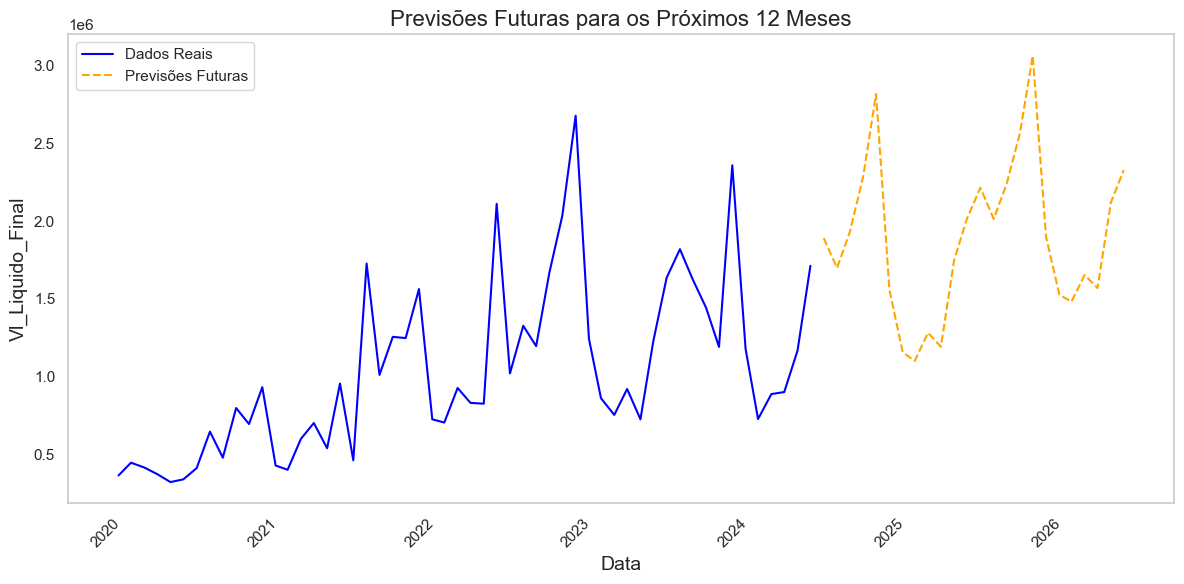

In [109]:
# Criar DataFrame para as previsões futuras
future_df = pd.DataFrame({'Data': future_dates, 'Previsões': future_predictions})
future_df.set_index('Data', inplace=True)

# Plotar os dados reais e as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado.index, df_filtrado['Vl_Liquido_Final'], label='Dados Reais', color='blue')

# Limitar o gráfico a apenas 12 meses a partir da última data
plt.plot(future_df.index, future_df['Previsões'], label='Previsões Futuras', color='orange', linestyle='--')

# Adicionar título e rótulos aos eixos
plt.title('Previsões Futuras para os Próximos 12 Meses', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vl_Liquido_Final', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

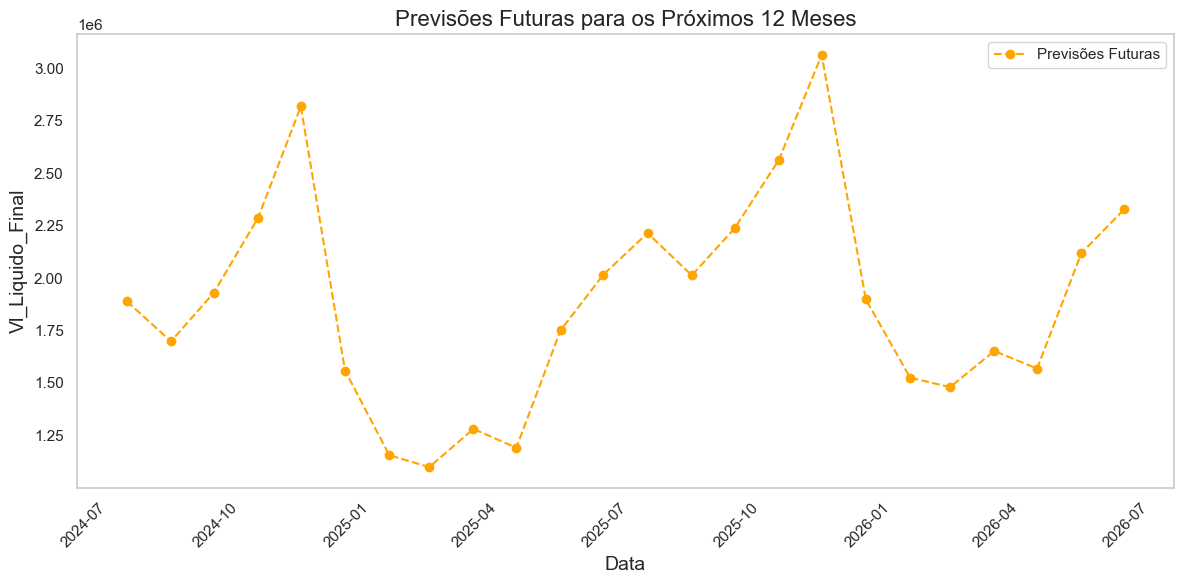

In [110]:
# Criar DataFrame para as previsões futuras
future_df = pd.DataFrame({'Data': future_dates, 'Previsões': future_predictions})
future_df.set_index('Data', inplace=True)

# Plotar apenas as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(future_df.index, future_df['Previsões'], label='Previsões Futuras', color='orange', linestyle='--', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Previsões Futuras para os Próximos 12 Meses', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vl_Liquido_Final', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

##### Hiperparâmetros
Para otimizar o modelo foram utilizados hiperparâmetros através do grid search manual, encontrando os melhores parâmetros do modelo e avaliando as novas métricas.

In [111]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definindo as variáveis independentes (exógenas) e a dependente
X = df_filtrado[['IPCA_ES', 'IPCA_BR', 'Taxa_Ac._TRI_%_PIB']]  # Adicione outras variáveis exógenas conforme necessário
y = df_filtrado['Vl_Liquido_Final']

# Separando uma amostra para o treino e outra para o teste
train_size = int(len(df_filtrado) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Parâmetros para o grid search
p = d = q = range(0, 2)  # Valores possíveis de p, d, q (ordem não sazonal)
P = D = Q = range(0, 2)  # Valores possíveis para P, D, Q (ordem sazonal)
m = [12]  # Sazonalidade mensal

# Lista para armazenar os resultados
best_aic = np.inf
best_params = None
best_model = None

# Grid Search Manual
for param in [(i, j, k) for i in p for j in d for k in q]:
    for seasonal_param in [(i, j, k, s) for i in P for j in D for k in Q for s in m]:
        try:
            # Criando o modelo SARIMAX
            model = SARIMAX(y_train, exog=X_train, order=param, seasonal_order=seasonal_param)
            model_fit = model.fit(disp=False)

            # Comparando os modelos pelo AIC
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_params = (param, seasonal_param)
                best_model = model_fit

        except Exception as e:
            continue

# Exibindo os melhores parâmetros encontrados
print(f'Melhores parâmetros: SARIMAX{best_params[0]} x {best_params[1]} - AIC:{best_aic}')

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular SMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100

# Exibir as métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'SMAPE: {smape}')

Melhores parâmetros: SARIMAX(1, 1, 1) x (0, 1, 0, 12) - AIC:873.7405882335855
MSE: 219728631211.25742
MAE: 331036.77848507697
R²: -0.02947210511741627
SMAPE: 21.803131639703647


### Televisão

##### Filtragem e Agrupamento de Dados por Veículo e Mês

In [113]:
# Defina o veículo pelo qual deseja filtrar
uen_digital = 0
uen_televisao = 1
uen_radio = 2

In [114]:
# Filtra o DataFrame pelo veículo especificado
df_filtrado = df[df['UEN'] == uen_televisao]

In [115]:
# Agrupa os dados por data (mês) e calcula as métricas especificadas para cada coluna
df_filtrado = df_filtrado.resample('ME').agg({
    'IPCA_ES': 'mean',          # Calcula a média de IPCA_ES
    'IPCA_BR': 'mean',          # Calcula a média de IPCA_BR
    'Vl_Liquido_Final': 'sum',  # Soma Vl_Liquido_Final, você pode mudar se necessário
    'Taxa_Ac._TRI_%_PIB': 'mean',  # Calcula a média de Taxa_Ac._TRI_%_PIB
}).reset_index()

# Exibe as primeiras linhas do dataframe agrupado
print(df_filtrado.head())

        data  IPCA_ES  IPCA_BR  Vl_Liquido_Final  Taxa_Ac._TRI_%_PIB
0 2020-01-31     0.29     0.21        4212371.91                 1.1
1 2020-02-29     0.33     0.25        4322070.94                 1.1
2 2020-03-31     0.12     0.07        4783127.68                 1.1
3 2020-04-30    -0.09    -0.31        3122055.18                -1.7
4 2020-05-31    -0.48    -0.38        3314159.05                -1.7


In [116]:
df_filtrado['data'] = pd.to_datetime(df_filtrado['data'])
df_filtrado.set_index('data', inplace=True)

In [117]:
df_filtrado.head()

,IPCA_ES,IPCA_BR,Vl_Liquido_Final,Taxa_Ac._TRI_%_PIB
data,,,,
2020-01-31,0.29,0.21,4212371.91,1.1
2020-02-29,0.33,0.25,4322070.94,1.1
2020-03-31,0.12,0.07,4783127.68,1.1
2020-04-30,-0.09,-0.31,3122055.18,-1.7
2020-05-31,-0.48,-0.38,3314159.05,-1.7


In [118]:
# Define a frquencia do índice
df_filtrado = df_filtrado.asfreq('ME')

In [119]:
print(df_filtrado.shape)

(54, 4)


In [120]:
# Variáveis exógenas e a variável alvo (exemplo)
X = df_filtrado[['IPCA_ES', 'IPCA_BR', 'Taxa_Ac._TRI_%_PIB']]  # Colunas exógenas
y = df_filtrado['Vl_Liquido_Final']  # Coluna alvo

In [121]:
# Separar os dados em treino e teste usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Imprimir o tamanho dos conjuntos]
print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")


Tamanho do conjunto de treino: 43
Tamanho do conjunto de teste: 11


### Modelagem

In [122]:
# Ajustar o modelo SARIMAX
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Sazonalidade mensal
model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Fazer previsões
y_pred = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular SMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100

# Exibir as métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'SMAPE: {smape}')

n_months = 24

# Garantir que o índice é do tipo datetime
if not isinstance(df_filtrado.index, pd.DatetimeIndex):
    df_filtrado.index = pd.to_datetime(df_filtrado.index)

# Obter a última data corretamente
last_date = df_filtrado.index[-1]  # Última data do DataFrame

# Verificar se a última data está no formato datetime
if not isinstance(last_date, pd.Timestamp):
    raise ValueError("A última data não é um objeto datetime")

# Gerar datas futuras com frequência mensal (ME: final de mês)
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_months, freq='ME')

# Preencher as variáveis exógenas futuras com base na média dos dados passados
future_X = pd.DataFrame(index=future_dates)
for col in X.columns:
    future_X[col] = X[col].mean()

# Fazer previsões futuras
future_predictions = model_fit.predict(start=len(y_train), end=len(y_train) + n_months - 1, exog=future_X)

print("Previsões futuras para o próximo ano:")
print(future_predictions)

MSE: 781832393143.3536
MAE: 737305.0294147787
R²: 0.5423455544143923
SMAPE: 11.573317367548158
Previsões futuras para o próximo ano:
2023-08-31    7.236631e+06
2023-09-30    6.520961e+06
2023-10-31    6.226311e+06
2023-11-30    7.243448e+06
2023-12-31    1.037146e+07
2024-01-31    6.150465e+06
2024-02-29    5.202727e+06
2024-03-31    6.391337e+06
2024-04-30    6.874117e+06
2024-05-31    7.469100e+06
2024-06-30    7.716351e+06
2024-07-31    7.044059e+06
2024-08-31    7.726849e+06
2024-09-30    7.095622e+06
2024-10-31    6.588897e+06
2024-11-30    7.659972e+06
2024-12-31    1.068967e+07
2025-01-31    6.910265e+06
2025-02-28    6.076359e+06
2025-03-31    7.189811e+06
2025-04-30    7.606671e+06
2025-05-31    7.987948e+06
2025-06-30    8.437566e+06
2025-07-31    7.793706e+06
Freq: ME, Name: predicted_mean, dtype: float64


##### Visualização dos dados

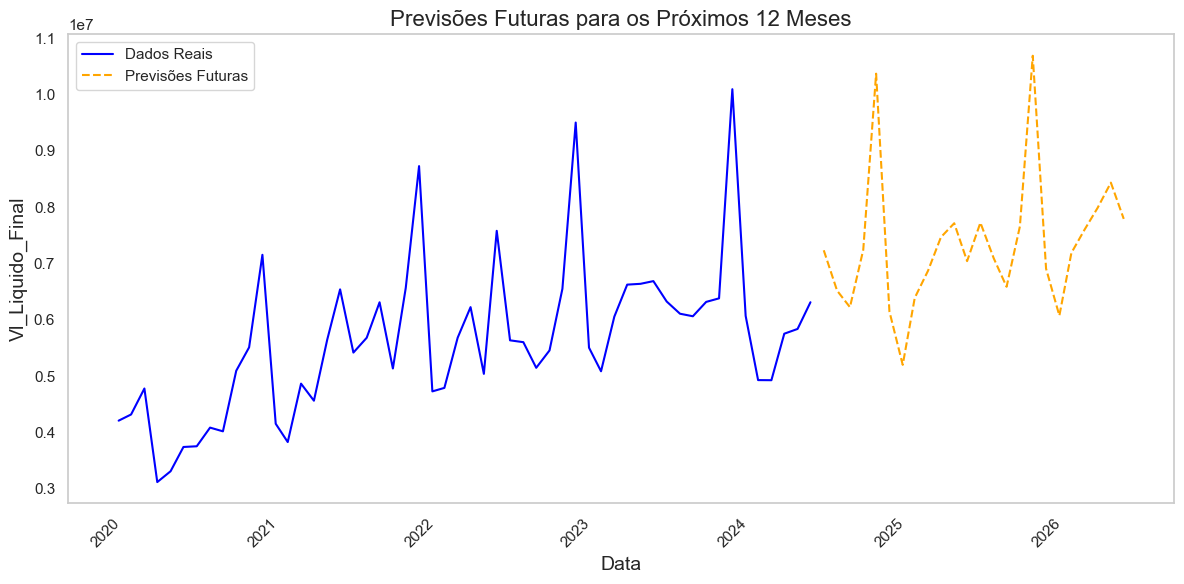

In [123]:
# Criar DataFrame para as previsões futuras
future_df = pd.DataFrame({'Data': future_dates, 'Previsões': future_predictions})
future_df.set_index('Data', inplace=True)

# Plotar os dados reais e as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado.index, df_filtrado['Vl_Liquido_Final'], label='Dados Reais', color='blue')

# Limitar o gráfico a apenas 12 meses a partir da última data
plt.plot(future_df.index, future_df['Previsões'], label='Previsões Futuras', color='orange', linestyle='--')

# Adicionar título e rótulos aos eixos
plt.title('Previsões Futuras para os Próximos 12 Meses', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vl_Liquido_Final', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

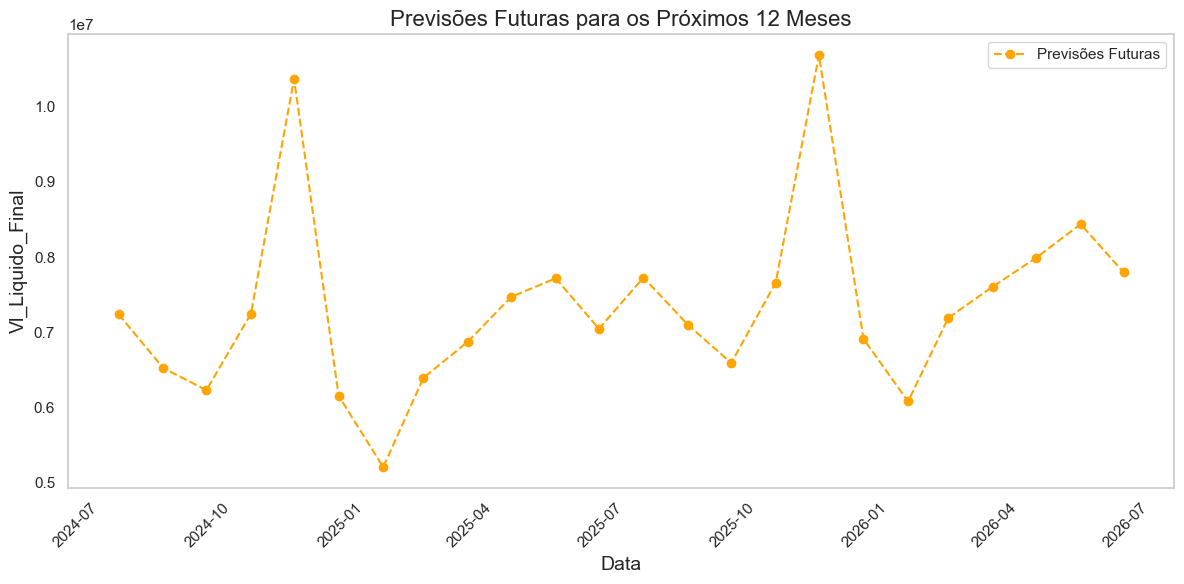

In [124]:
# Criar DataFrame para as previsões futuras
future_df = pd.DataFrame({'Data': future_dates, 'Previsões': future_predictions})
future_df.set_index('Data', inplace=True)

# Plotar apenas as previsões futuras
plt.figure(figsize=(12, 6))
plt.plot(future_df.index, future_df['Previsões'], label='Previsões Futuras', color='orange', linestyle='--', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Previsões Futuras para os Próximos 12 Meses', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vl_Liquido_Final', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Exibir o gráfico
plt.tight_layout()
plt.show()

##### Hiperparâmetros
Para otimizar o modelo foram utilizados hiperparâmetros através do grid search manual, encontrando os melhores parâmetros do modelo e avaliando as novas métricas.

In [125]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definindo as variáveis independentes (exógenas) e a dependente
X = df_filtrado[['IPCA_ES', 'IPCA_BR', 'Taxa_Ac._TRI_%_PIB']]  # Adicione outras variáveis exógenas conforme necessário
y = df_filtrado['Vl_Liquido_Final']

# Separando uma amostra para o treino e outra para o teste
train_size = int(len(df_filtrado) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Parâmetros para o grid search
p = d = q = range(0, 2)  # Valores possíveis de p, d, q (ordem não sazonal)
P = D = Q = range(0, 2)  # Valores possíveis para P, D, Q (ordem sazonal)
m = [12]  # Sazonalidade mensal

# Lista para armazenar os resultados
best_aic = np.inf
best_params = None
best_model = None

# Grid Search Manual
for param in [(i, j, k) for i in p for j in d for k in q]:
    for seasonal_param in [(i, j, k, s) for i in P for j in D for k in Q for s in m]:
        try:
            # Criando o modelo SARIMAX
            model = SARIMAX(y_train, exog=X_train, order=param, seasonal_order=seasonal_param)
            model_fit = model.fit(disp=False)

            # Comparando os modelos pelo AIC
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_params = (param, seasonal_param)
                best_model = model_fit

        except Exception as e:
            continue

# Exibindo os melhores parâmetros encontrados
print(f'Melhores parâmetros: SARIMAX{best_params[0]} x {best_params[1]} - AIC:{best_aic}')

# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcular SMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100

# Exibir as métricas
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'SMAPE: {smape}')

Melhores parâmetros: SARIMAX(1, 1, 1) x (0, 1, 0, 12) - AIC:922.3271605921152
MSE: 921811257067.6444
MAE: 803653.4050903226
R²: 0.4604073411543689
SMAPE: 12.850702178685273


# Conclusão

Neste notebook, passamos por todas as etapas essenciais para desenvolver um modelo preditivo eficiente utilizando várias abordagens de machine learning e séries temporais. O objetivo foi encontrar o modelo mais adequado para prever a variável "Vl_Liquido_Final" com base em fatores econômicos e setoriais, como IPCA_ES, IPCA_BR e Taxa_Ac.TRI%_PIB.

1. Instruções de Uso: Explicamos como utilizar o notebook, incluindo a instalação de bibliotecas e a estrutura das seções.

2. Importação de Bibliotecas: Carregamos bibliotecas essenciais como pandas, scikit-learn e statsmodels.

3. Limpeza de Tabelas: Realizamos conversões de tipos e tratamento de valores ausentes para garantir dados consistentes.

4. Clusterização: Aplicamos KMeans para identificar padrões ocultos e segmentar os dados.

5. Treinamento dos Modelos:

- XGBoost: Ofereceu boa precisão em datasets complexos.
Random Forest: A abordagem de ensemble reforçou a robustez do modelo.
- SARIMAX: Capturou padrões sazonais e temporais de forma eficaz.
- Keras: Exploramos redes neurais para identificar padrões não-lineares.

6. Avaliação e Comparação: Comparando R², MSE e MAE, o SARIMAX se destacou como o melhor modelo para dados temporais.

7. Modelo Final - SARIMAX: Implementado com ajustes refinados para capturar a dinâmica temporal e prever dados gerais e segmentados por UEN.

#### Reflexão Final
Este projeto destacou a relevância de abordar problemas preditivos com diferentes perspectivas. Ao utilizar técnicas variadas de machine learning e modelos de séries temporais, foi possível explorar características distintas dos dados e obter previsões mais precisas. Cada abordagem contribuiu de maneira única, mas o SARIMAX demonstrou maior capacidade em capturar padrões temporais complexos, o que resultou em previsões mais consistentes para dados financeiros. O processo envolveu ajustes constantes e comparações entre os modelos, garantindo que a solução final fosse adequada ao problema proposto.

A construção de um modelo preditivo demandou um trabalho iterativo, com atenção a detalhes técnicos e refinamento das parametrizações. O sucesso do SARIMAX, particularmente na identificação de tendências e sazonalidades, consolidou seu uso como o modelo final. A partir desta base, há espaço para futuras melhorias, como a inclusão de novas variáveis explicativas ou a combinação de técnicas para criar modelos híbridos. Esse projeto deixa uma estrutura sólida para novas iterações e adaptações, proporcionando um caminho claro para a evolução das previsões financeiras da Gazeta.